# Stock trading

Import all dependencies

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import mpld3
import json
import datetime as dt
from matplotlib import style
import pandas as pd
import numpy as np
import pickle
from scipy.signal import argrelextrema
import pandas_datareader.data as web
from borsdata_sdk import BorsdataAPI
from pandas.plotting import register_matplotlib_converters
from collections import Counter
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
from collections import defaultdict
from sklearn.model_selection import train_test_split
from algorithm import Algorithm
register_matplotlib_converters()
style.use('ggplot')
mpld3.enable_notebook()

Connect to the BorsdataAPI and convert all companies to their Borsdata ID

In [2]:
borsdata = BorsdataAPI('c57d9eef77df44cc9289560af51a7e44')
name_to_id_dict = {"AarhusKarlshamn":2,"ABB":3,"Acando":4,"Active Biotech":6,"Addnode":7,"Addtech":8,"Alfa Laval":10,"A3 Allmänna IT- och Telekom":12,"Anoto":13,"Arise Windpower":14,"Assa Abloy":17,"AstraZeneca":18,"Atlas Copco A":19,"Atrium Ljungberg":20,"Autoliv":21,"Avanza":22,"Axfood":24,"Bergman & Beving":26,"BE Group":27,"Beijer Ref":28,"Beijer Alma":29,"Beijer Electronics":30,"Bergs Timber":31,"Betsson":32,"Bilia":33,"BillerudKorsnäs":34,"BioGaia":35,"Bioinvent":36,"Biotage":37,"Björn Borg":38,"Boliden":40,"Bong Ljungdahl":41,"Brinova":42,"BTS Group":43,"Bure Equity":44,"Byggmax":45,"Castellum":46,"Catena":47,"Qliro Group":48,"CellaVision":49,"Clas Ohlson":51,"Cloetta":52,"Concordia Maritime":54,"Consilium":56,"Corem A":57,"CTT Systems":58,"Diamyd Medical":62,"Diös":63,"Doro":64,"Duni":65,"Duroc":66,"Eastnine":67,"Elanders":68,"Electra Gruppen":69,"Electrolux B":70,"Elekta":71,"Elos":72,"Enea":73,"Eniro":74,"EnQuest":75,"Ericsson B":77,"Etrion":78,"eWork":79,"Fabege":80,"Fagerhult":81,"Fast Partner":82,"Fast Balder":83,"Feelgood":84,"Fenix Outdoor":85,"Fingerprint Cards":86,"Formpipe Software":87,"Getinge":88,"GHP Specialty Care":90,"Gunnebo":91,"ICA Gruppen":92,"Haldex":93,"Havsfrun Investment":94,"Heba":95,"Hennes & Mauritz":97,"Hexagon":98,"Hexpol":99,"HiQ":100,"HMS Networks":101,"Holmen B":102,"Hufvudstaden A":103,"Husqvarna B":104,"I.A.R Systems":106,"Image Systems":108,"Industrivärden C":109,"Indutrade":110,"ICTA":111,"Intrum":112,"Investor B":113,"ITAB Shop Concept":114,"JM":116,"Kabe":117,"KappAhl":118,"Karo Pharma":119,"Kinnevik B":120,"Klövern A":121,"KnowIT":122,"Kungsleden":123,"Lagercrantz":124,"Lammhults Design":125,"Latour":126,"Lindab":127,"Loomis":129,"Lundbergföretagen":130,"Lundin Mining":131,"Lundin Petroleum":132,"Malmbergs Elektriska":134,"Medivir":136,"Mekonomen":137,"Mycronic":140,"Midsona B":141,"Midway B":142,"Millicom":143,"Stockwik":144,"Amasten":145,"MQ":146,"Empir Group":147,"MTG B":148,"MultiQ":149,"NAXS Nordic Access":150,"NCC B":151,"Nederman":152,"NetEnt":153,"Net Insight":154,"New Wave":155,"NIBE":156,"Nobia":157,"Nolato":158,"Nordea Bank":159,"NOTE":162,"Strax":163,"Novotek":164,"Oasmia Pharmaceutical":166,"Odd Molly":167,"OEM":168,"Trention":169,"Orexo":170,"Oriflame":171,"Ortivus B":172,"Peab":175,"Poolia":177,"Precise Biometrics":178,"Prevas":179,"Pricer":180,"ProAct IT":181,"Probi":182,"ProfilGruppen":184,"Ratos B":185,"RaySearch Laboratories":186,"Rejlerkoncernen":188,"RNB Retail and Brands":189,"Rottneros":191,"Saab":193,"Sagax A":194,"Sandvik":195,"SAS":196,"SCA B":197,"SEB A":199,"Sectra":200,"Securitas":201,"Semcon":202,"Sensys Gatso":203,"Handelsbanken A":204,"SinterCast":206,"Skanska":207,"SKF B":208,"SkiStar":209,"Softronic":210,"SSAB A":211,"Stora Enso R":212,"Studsvik":213,"Svedbergs":214,"Svolder B":215,"Sweco B":216,"Swedbank":217,"Swedish Match":218,"Swedish Orphan Biovitrum":219,"Swedol":220,"Systemair":221,"Tele2 B":222,"Telia Company":223,"Tieto":224,"Traction":225,"TradeDoubler":226,"Viking Supply":227,"Trelleborg":229,"Agromino":230,"Kindred Group":231,"VBG":233,"Venue Retail Group":234,"Vitrolife":235,"Volvo B":236,"Vostok New Ventures":237,"Wallenstam":238,"Wihlborgs":239,"XANO Industri":240,"ÅF":241,"Öresund":242,"Karolinska Development":243,"Boule Diagnostics":244,"Dedicare":245,"Moberg Pharma":246,"Concentric":247,"Cavotec":248,"Nokia":249,"Micro Systemation":251,"Vitec Software":252,"Semafo":253,"Bulten":254,"Moment Group":255,"ADDvise Group A":257,"Africa Oil":258,"Arctic Minerals":262,"Avensia":263,"Avtech":264,"Bredband2":268,"C-RAD":270,"Catella B":274,"Auriant Mining":275,"Confidence":277,"Creades":278,"DistIT":282,"Diadrom":283,"Dignitana":285,"Drillcon":287,"Ellen":288,"Kakel Max":289,"Endomines":290,"Eolus Vind":291,"EOS Russia":292,"Episurf":293,"Firefly":295,"Wifog":296,"Generic Sweden":297,"Genovis":298,"Binero Group":299,"Götenehus Group":300,"Hansa Biopharma":301,"Stendörren":302,"Hifab":303,"Impact Coatings":304,"Invisio Communications":306,"Jays":308,"JLT Mobile Computers":309,"Kancera":310,"Copperstone":312,"Kopy Goldfields":313,"Lightlab":315,"Lucara Diamond":316,"Mackmyra":317,"MedCap":318,"Modern Ekonomi":320,"Misen Energy":321,"NetJobs":322,"New Nordic Healthbrands":323,"Nischer":324,"Online Brands Nordic":325,"OPUS Prodox":326,"Pallas":328,"Sensori":329,"Saxlund":331,"PledPharma":332,"Precio Fishbone":333,"Precomp Solutions":334,"ENLABS":336,"ScandBook":339,"ShaMaran":342,"SJR":343,"Skåne-möllan":344,"Skånska Energi":345,"Allgon":346,"Stille":347,"TagMaster":348,"Tethys Oil":349,"Unlimited Travel Group":352,"Victoria Park A":353,"Nordic Flanges":354,"WeSC":355,"Westpay":356,"Wise Group":357,"ZetaDisplay":360,"ALM Equtiy":364,"Mangold":365,"Platzer":366,"aXichem":369,"Sportamore":370,"Nexam":371,"Xvivo Perfusion":372,"Hemfosa":374,"Bufab":375,"Bactiguard":377,"NGEx Resources":378,"Recipharm":379,"Scandi Standard":380,"Arctic Paper":381,"Besqab":382,"G5 Entertainment":383,"NeuroVive Pharmaceutical":384,"Oscar Properties":385,"Starbreeze B":386,"Cell Impact":387,"BIMobject":389,"Delarka":390,"Immunicum":391,"Polyplank":392,"Fastator":393,"Ages Industri":395,"Brighter":396,"Clavister":397,"Cortus Energy":398,"Hembla":399,"Dome Energy":400,"Doxa":401,"Hanza":403,"Heliospectra":404,"Hexatronic":405,"Kallebäck Property":407,"Kambi":408,"Kentima":409,"Mavshack":411,"Irisity":412,"myFC Holding":413,"New Equity Venture":414,"Nicoccino":415,"Clemondo":416,"ScandiDos":418,"Scandinavian Enviro":419,"Advenica":420,"myTaste":421,"LIDDS":422,"DDM Holding":423,"Inwido":424,"Gränges":426,"GWS Production":427,"Thule":428,"Sprint Bioscience":429,"Nexstim":430,"Bayn Europe":431,"Papilly":432,"Arcoma":433,"PowerCell":434,"Christian Berner Tech":436,"Absolent":437,"Samhällsbyggnadsbolag B":438,"Italeaf":439,"Lifco":440,"NP3":441,"AHA World":442,"Alteco Medical":443,"Ambia Trading":444,"Axkid":445,"BrainCool":446,"C Security":447,"DexTech Medical":449,"Igrene":450,"RootFruit":451,"Sealwacs":452,"Zenicor Medical":453,"Gabather":454,"Follicum":455,"Oboya Horticulture":456,"Precisionsmetall":457,"Real Heart":458,"Greater Than":459,"Ecoclime Comfort Ceilings":460,"QBNK":461,"Phase Holographic":462,"Emotra":464,"Envirologic":465,"EQL Pharma":466,"Tourn":468,"Josab Water Solutions":470,"Storytel":471,"Motion Display":473,"OptiFreeze":474,"Ortoma":475,"PromikBook":476,"ProstaLund":477,"Saniona":478,"Serstech":479,"SyntheticMR":480,"RLS Global":482,"A1M Pharma":483,"Enzymatica":484,"Spago Nanomedical":486,"Sivers IMA":489,"Safe at Sea":490,"Recyctec":491,"Angler Gaming":492,"Beowulf Mining":494,"Peptonic Medical":495,"Red Reserve":496,"ECOMB":497,"EcoRub":498,"Alphahelix":499,"Amnode":500,"Amhult 2":501,"Umida Group":502,"AQ Group":505,"AroCell":506,"Archelon":507,"Botnia Exploration":508,"EasyFill":509,"European institute":510,"Gullberg & Jansson":511,"Challenger Mobile":512,"Eurocon":513,"Slottsviken B":517,"Deflamo":518,"Smart Energy":519,"Bahnhof":520,"Clinical Laserthermia":521,"Jojka Communications":522,"Latvian Forest":523,"Medfield":524,"Net Gaming Europe":525,"TiksPac":526,"Wonderful Times":527,"MediRätt":528,"Miris":529,"Consensus":530,"SensoDetect":531,"Cherry":533,"HomeMaid":534,"IDL Biotech":536,"MedicPen":538,"NGS":540,"Transferator A":541,"Everysport Media":542,"Exalt":544,"True Heading":545,"Respiratorius":546,"Eurocine Vaccines":548,"Future Gaming":549,"WntResearch":550,"Vindico Security":551,"PharmaLundensis":553,"Arbona B":554,"Star Vault":555,"Railcare":557,"NFO Drives":558,"Lovisagruvan":559,"FX International":560,"Genesis IT":561,"Novus":562,"Arc Aroma Pure":563,"Taurus Energy":564,"QuiaPEG":565,"Parans Solar":566,"Micropos Medical":567,"Klick Data":568,"Senzime":569,"Kopparbergs":570,"Crown Energy":571,"Sotkamo Silver":572,"Lifeassays":573,"Sveriges Bostadsrättscentrum":574,"MedicaNatumin":575,"LC-Tec":576,"Glycorex Transplantation":577,"AIK Fotboll":578,"Paynova":579,"Guideline Geo":580,"Obducat":581,"Metallvärden":582,"Advanced Stabilized Tech":583,"Hedera":585,"Briox":586,"Free2Move":587,"LightAir":588,"Fortnox":589,"Mertiva":591,"MVV Holding":592,"Exeotech Invest":593,"Zinzino":594,"Lundin Gold":595,"Eltel":596,"Ahlstrom-Munksjö":597,"Byggmästare AJ Ahlström":598,"Intuitive Aerial":599,"Saltängen Property":600,"Verisec":601,"Dustin Group":602,"Lexington":603,"Karessa Pharma":604,"OrganoClick":605,"Torslanda Property":606,"Acrinova":607,"Corem Pref":608,"Eniro pref":609,"Fast Partner Pref":610,"Klövern Pref":612,"Amasten Pref":613,"Sagax Pref":615,"Victoria Park Pref":617,"ALM Equity Pref":618,"Oscar P. Pref":619,"Hemfosa Pref":620,"Prime Living Pref":622,"Sdiptech Pref":623,"Akelius R. Pref":624,"Tobin P. Pref":626,"Omx Sthlm 30":627,"Omx Sthlm 30 GI":637,"Omx Sthlm All":638,"Omx Sthlm All GI":639,"Omx Sthlm 50 EW":640,"Omx Sthlm 60 GI":641,"Omx Sthlm 60":642,"Omx Sthlm Large Cap":643,"Omx Sthlm Mid Cap":644,"Omx Sthlm Small Cap":645,"Omx Sthlm Oil&Gas":646,"Omx Sthlm Materials":647,"Omx Sthlm Industrial":648,"Omx Sthlm Consumer":649,"Omx Sthlm Health":650,"Omx Sthlm Services":651,"Omx Sthlm Telecom":652,"Omx Sthlm Utilities":653,"Omx Sthlm Financials":654,"Omx Sthlm Technology":655,"Omx Helsi 25":656,"Omx Helsi 15":657,"Omx Helsi All":658,"Omx Helsi All GI":659,"Omx Helsi Large Cap":660,"Omx Helsi Mid Cap":661,"Omx Helsi Small Cap":662,"Omx Helsi Oil&Gas":663,"Omx Helsi Materials":664,"Omx Helsi Industrial":665,"Omx Helsi Consumer":666,"Omx Helsi Health":667,"Omx Helsi Services":668,"Omx Helsi Telecom":669,"Omx Helsi Utilities":670,"Omx Helsi Financials":671,"Omx Helsi Technology":672,"Amer Sports":673,"Cargotec":674,"Citycon":675,"Elisa":676,"Fiskars":677,"Fortum":678,"Huhtamäki":679,"Kemira":680,"Kesko B":681,"KONE":682,"Konecranes":683,"Metso":684,"Neste":685,"Nokia Oyj":686,"Nokian Renkaat":687,"Nordea Bank":688,"Orion B":689,"Outokumpu":690,"Outotec":691,"Sampo":692,"Sanoma":693,"SSAB B Oyj":695,"Stora Enso R Oyj":696,"Telia Company oyj":697,"Tieto Oyj":698,"UPM-Kymmene":699,"Valmet":700,"Wärtsilä":701,"YIT":702,"Basware":703,"Aktia Bank Abp":704,"Caverion":705,"Oriola B":706,"Ahlstrom-Munksjö Oyj":707,"Atria":709,"K2A Pref":711,"Volati Pref":712,"Aspo":713,"Alma Media":714,"Cramo":715,"Bittium":716,"Finnair":717,"F-Secure":719,"Lassila & Tikanoja":720,"HKScan":722,"Metsä Board B":723,"Olvi":724,"Ponsse 1":726,"Pöyry":727,"Raisio":728,"Rapala":729,"Ramirent":730,"SRV Yhtiöt":731,"Stockmann B":732,"Tikkurila":733,"Uponor":735,"Vaisala":736,"Viking Line":737,"Pandox":738,"Alimak":739,"Collector":740,"Coor Service Management":741,"Hoist Finance":742,"Nobina":743,"Tobii":745,"Troax Group":746,"Cantargia":748,"Corline Biomedical":749,"Evolution Gaming":750,"Gaming Corps":751,"Heimstaden Pref":752,"Hövding":753,"Inission":754,"Kontigo Care":755,"Magnolia":756,"Nilörngruppen":758,"Pegroco Pref":759,"Prime Living":760,"SavoSolar":761,"Scibase":762,"SolTech Energy":763,"Spiffbet":764,"TargetEveryOne":765,"SaltX Technology":766,"Aptahem":767,"Cline Scientific":768,"CombiGene":769,"Idogen":770,"Nanexa":771,"Orezone":772,"Pharmacolog":773,"Redsense Medical":774,"Transtema":775,"Vibrosense Dynamics":776,"Bonäsudden":779,"IVISYS":780,"Link Prop":781,"Asiakastieto":782,"Pihlajalinna":783,"Insplorion":784,"SpectraCure":785,"Endomines Oyj":786,"Sotkamo Silver Oyj":787,"Saga Furs":788,"Neo Industrial":789,"Valoe":791,"Apetit":792,"Afarak":793,"Aspocomp":794,"CapMan":796,"Componenta":797,"Digia":799,"Dovre":800,"Efore":801,"eQ Oyj":802,"Etteplan":803,"Suominen":804,"Solteq":807,"Exel Composites":808,"Glaston":809,"Innofactor":810,"SSH Communications":812,"Ålandsbanken B":813,"Raute":814,"Biohit":815,"QPR Software":816,"Elecster":817,"Honkarakenne":819,"Ilkka-Yhtymä 2":820,"Incap":821,"Digitalist Group":822,"Oravo":823,"Marimekko":824,"Martela":825,"Nurminen Logistics":826,"Keskisuomalainen":827,"Kesla":828,"Pohjois-Karjalan":829,"Revenio":830,"Sievi Capital":831,"Soprano":832,"Investors House":833,"Trainers House":836,"Uutechnic":837,"Yleiselektroniikka":838,"NoHo Partners":839,"Panostaja":840,"Scanfil":841,"Tecnotree":842,"Teleste":843,"Tulikivi":844,"Wulff-Yhtiöt":845,"OMX Copen 20":846,"OMX Copen 20 GI":847,"OMX Copen All":848,"OMX Copen All GI":849,"OMX Copen Large C":850,"OMX Copen Mid C":851,"OMX Copen Small C":852,"OMX Copen Oil&Gas":853,"OMX Copen Industrial":854,"OMX Copen Goods":855,"OMX Copen Health":856,"OMX Copen Sercives":857,"OMX Copen Telecom":858,"OMX Copen Utilities":859,"OMX Copen Financials":860,"OMX Copen Technology":861,"OB Oslo 25":862,"OB Oslo 25 GI":863,"OB Oslo All":864,"OB Axess All":865,"OB Oslo Oil&Gas":866,"OB Oslo Industrial":867,"OB Oslo Staples":868,"OB Oslo Health":869,"OB Oslo Consumer":870,"OB Oslo Utilities":871,"OB Oslo Financials":872,"OB Oslo Technology":873,"Vostok Emerging":874,"Ahola Transport":875,"Double Bond Pharma":876,"Hybricon":877,"Oncology Venture":878,"Swemet":880,"Footway Pref":882,"Aker Solutions":884,"BW LPG":885,"Aker BP":886,"DNB":887,"DNO":888,"A.P. Moller Maersk B":889,"Carlsberg B":890,"Chr Hansen":891,"Coloplast":892,"Danske Bank":893,"Dolphin Drilling":894,"Frontline":895,"Gjensidige Forsikring":896,"Mowi":897,"Nordic Semiconductor":898,"DSV":899,"FLSmidth & Co.":900,"G4S":901,"Genmab":902,"GN Store Nord":903,"Equinor":904,"Kotipizza":905,"Novo Nordisk":906,"Capacent":907,"Sinch - CLX Communications":908,"Bravida":909,"Dometic":910,"Klaria Pharma":911,"MoxieTech":912,"Minesto":913,"Photocat":914,"Waystream":915,"Alzinova":916,"Hamlet Pharma":917,"Nanologica":918,"PExA":919,"Attendo":920,"Camurus":921,"Scandic Hotels":922,"AdCityMedia":923,"Immunovia":924,"Nilsson Special Vehicles":925,"Stillfront":926,"TC TECH":927,"Vicore Pharma":928,"Zenergy":929,"Evli Pankki":930,"Consti Yhtiöt":931,"Genova Property Pref":932,"Nuevolution":933,"IMINT":934,"Toleranzia":935,"Prebona":936,"QuickCool":937,"Implementa Sol":938,"Pandora":939,"Vestas Wind Systems":940,"Royal UNIBREW":941,"Lundbeck":942,"Nordea Bank":943,"Orkla":944,"Yara International":945,"ISS":946,"Jyske Bank":947,"Kobenhavns Lufthavne":948,"Novozymes":949,"DalsSpira Mejeri":950,"Rockwool B":951,"Sydbank":952,"Topdanmark":954,"Tryg":955,"Demant":956,"Norsk Hydro":957,"Norwegian Air Shuttle":958,"Otello":959,"Petroleum Geo-Services":960,"REC Silicon":961,"Schibsted A":962,"Seadrill":963,"Storebrand":964,"Subsea7":965,"Telenor":966,"TGS-NOPEC":967,"Avance Gas":968,"Bakkafrost":969,"Raybased":970,"FastOut Int.":971,"Sleepo":972,"NEXT Biometrics":973,"Zalaris":974,"NattoPharma":975,"Medistim":976,"Matas":977,"FirstFarms":978,"Sino Agro Food":979,"Esoft Systems":980,"Detection":982,"Xbrane Biopharma":983,"Catena Media":984,"Sjöstrand Coffee":985,"Invent Medic":986,"Loudspring Oyj":988,"EAB Group":989,"Herantis Pharma":991,"Nexstim Oyj":992,"Nixu":993,"Piippo":994,"Robit":995,"SavoSolar Oyj":996,"Siili Solutions":997,"Taaleri":998,"Talenom":999,"United Bankers":1000,"Verkkokauppa.com":1001,"XXL":1002,"LeoVegas":1004,"Insr Insurance":1005,"Bonheur":1006,"Protector":1007,"Thin Film":1008,"AF Gruppen":1009,"Humana":1010,"GARO":1011,"Dividend Sweden":1012,"RhoVac":1013,"Polygiene":1014,"AddLife":1015,"Ocean Yield":1017,"Kvaerner":1018,"StrongPoint":1020,"Atea":1021,"Wallenius Wilhelmsen":1022,"Stolt-Nielsen":1023,"Tomra Systems":1024,"Veidekke":1025,"Kongsberg Gruppen":1026,"SalMar":1027,"Napatech":1028,"Bang & Olufsen":1029,"IC Group":1030,"Flugger":1031,"Roblon":1032,"Xintela":1033,"ABG Sundal Collier":1034,"Hiddn Solutions":1035,"Akastor":1036,"Aker":1037,"AKVA Group":1038,"American Shipping":1039,"Aqualis":1040,"Archer":1041,"Austevoll Seafood":1042,"Avocet Mining":1043,"Belships":1044,"Solon Eiendom":1045,"Biotec Pharmacon":1046,"Techstep":1047,"Wilh. Wilhelmsen B":1048,"Borgestad":1049,"Borregaard":1050,"BW Offshore Limited":1051,"ContextVision":1052,"Simris Alg":1054,"DOF":1055,"Eidesvik Offshore":1056,"Electromagnetic Geoservices":1057,"Entra":1058,"Funcom":1060,"Gaming Innovation":1061,"Golden Ocean":1063,"Goodtech":1064,"Grieg Seafood":1065,"Havila Shipping":1066,"Hexagon Composites":1067,"Höegh LNG":1068,"IDEX":1070,"InterOil Exploration":1071,"Element":1072,"Jinhui Shipping":1073,"Kongsberg Automotive":1074,"Infant Bacterial":1075,"Sydsvenska Hem":1076,"Suomen Hoivatilat":1077,"Plejd":1078,"Vadsbo SwitchTech":1079,"Litium":1080,"Nepa":1081,"Resurs Holding":1082,"Leroy Seafood":1083,"Multiconsult":1084,"Navamedic":1085,"NEL":1086,"NextGenTel":1087,"Axactor":1088,"Nordic Nanovector":1089,"Norway Royal Salmon":1091,"Norwegian Energy":1092,"Norwegian Property":1093,"NRC Group":1094,"Odfjell B":1095,"Odfjell Drilling":1096,"Olav Thon":1097,"Panoro Energy":1098,"Petrolia":1099,"Photocure":1100,"Polarcus":1101,"Prosafe":1102,"Q-Free":1103,"Questerre Energy":1104,"SAS Nok":1106,"Incus Investor":1107,"Scatec Solar":1108,"Selvaag Bolig":1109,"SeaBird Exploration":1111,"Magnora":1112,"Siem Offshore":1113,"Solstad Offshore":1114,"SpareBank":1116,"Spectrum":1117,"Storm Real Estate":1118,"Team Tankers":1121,"TTS Group":1122,"Voss Veksel Landmandsbank":1126,"Carasent":1127,"Arendals Fossekompani":1128,"Asetek":1129,"Atlantic Petroleum":1130,"Endur":1131,"Bouvet":1132,"Byggma":1133,"Data Respons":1134,"EMAS Offshore":1135,"Europris":1136,"Paradox Interactive":1137,"GC Rieber Shipping":1138,"Gyldendal":1139,"Havyard Group":1140,"Itera":1141,"Kid":1142,"Kitron":1143,"Oceanteam":1144,"NTS":1145,"Polaris Media":1146,"RAK Petroleum":1147,"Reach Subsea":1148,"Sbanken":1150,"The Scottish Salmon":1153,"Wilson":1154,"African Petroleum":1155,"Aqua Bio Technology":1156,"Awilco Drilling":1158,"Awilco LNG":1159,"Hunter Group":1160,"Cxense":1161,"EAM Solar":1162,"Hofseth BioCare":1163,"FLEX LNG":1164,"5th Planet Games":1165,"Magseis Fairfield":1167,"Nordic Mining":1169,"North Energy":1170,"PCI Biotech":1171,"Philly Shipyard":1172,"Pioneer Property Pref":1173,"RomReal":1175,"S.D. Standard Drilling":1176,"Saga Tankers":1177,"Scanship":1178,"Vistin Pharma":1180,"Aasen Sparebank":1181,"Atlantic Lumpus":1182,"Black Sea Property":1183,"Induct":1184,"WR Entertainment":1186,"ALK-Abello":1187,"Alm. Brand":1188,"Ambu":1189,"Bavarian Nordic":1190,"DS Norden":1191,"DFDS":1192,"Athena Investments":1193,"Jeudan":1194,"Jutlander Bank":1195,"NKT Holding":1196,"NNIT":1197,"Onxeo":1199,"Per Aarsleff":1200,"Ringkjobing Landbobank":1201,"SAS ddk":1202,"Schouw & Co.":1203,"SimCorp":1204,"Solar":1205,"Sparekassen Sjaelland":1206,"Tivoli":1207,"Spar Nord Bank":1208,"United Int. Enterprises":1209,"Veloxis Pharmaceuticals":1210,"Zealand Pharma":1211,"Össur":1212,"AaB":1213,"AGF B":1214,"Admiral Capital":1215,"Andersen & Martini":1216,"Arkil Holding":1217,"Atlantic Petroleum ddk":1219,"BankNordik":1220,"BioPorto":1221,"Blue Vision":1222,"Brd. Klee":1224,"Brdr. A&O Johansen":1225,"Brdr. Hartmann":1226,"Brondby IF":1227,"cBrain":1228,"ChemoMetec":1229,"Columbus":1230,"Copenhagen Capital":1231,"Danske Andelskassers":1233,"Dantax":1234,"Djurslands Bank":1236,"DLH":1237,"Erria":1239,"Boliga Gruppen":1240,"F.E. Bording":1243,"Fast Ejendom":1244,"Fynske Bank":1245,"Gabriel Holding":1246,"German High Street":1247,"Glunz & Jensen":1248,"Grönlandsbanken":1249,"Gyldendal B":1250,"HH International":1251,"Harboes Bryggeri":1252,"Hvidbjerg Bank":1253,"MT Hojgaard B":1254,"InterMail":1255,"Kreditbanken":1256,"Lollands Bank":1258,"Luxor":1259,"Lån og Spar Bank":1260,"Migatronic":1261,"Mons Bank":1264,"NeuroSearch":1265,"NewCap Holding":1266,"Nordfyns Bank":1267,"Nordic Shipholding":1268,"Park Street Nordicom":1269,"North Media":1270,"NTR Holding":1271,"PARKEN Sport":1273,"Prime Office":1274,"Rias":1275,"RTX":1276,"Salling Bank":1277,"Sanistål":1278,"Santa Fe Group":1279,"Scandinavian Brake":1280,"Scandinavian Private":1281,"Silkeborg IF":1282,"SKAKO":1283,"Skjern Bank":1284,"Small Cap Danmark":1285,"SP Group":1286,"Rovsing":1287,"Strategic Investments":1288,"TK Development":1289,"Cemat":1290,"TORM":1291,"Totalbanken":1292,"Vestjysk Bank":1293,"Victoria Properties":1295,"EgnsINVEST":1297,"Enalyzer":1298,"FastPassCorp":1299,"Jobindex":1300,"WIRTEK":1302,"Tokmanni Group":1303,"Lehto Group":1304,"Qt Group":1305,"Real Holding":1306,"Talkpool":1309,"Lauritz":1310,"Provide IT":1311,"Swedencare":1312,"B3 Consulting":1313,"Bosjö Fastigheter":1314,"Clean Motion":1315,"FrontOffice Nordic":1316,"SynAct Pharma":1317,"Alelion Energy":1319,"BrandBee":1320,"TF Bank":1321,"Nordic Waterproofing":1322,"AcadeMedia":1323,"Orsted":1324,"Bonava B":1325,"PiezoMotor":1326,"Cyxone":1327,"Oscar Properties Pref B":1328,"Loudspring":1329,"Enorama Pharma":1330,"Mediacle":1331,"GomSpace":1333,"Redwood Pharma":1334,"Shortcut Media":1335,"Absolicon":1336,"Cereno Scientific":1337,"Privanet":1338,"Pareto Bank":1339,"Treasure":1340,"Norwegian Finans":1341,"Avidly":1342,"B2Holding":1343,"Aega":1344,"Scandinavian Tobacco":1345,"MaxFast Properties":1347,"Quartiers Properties Pref":1349,"Gold Town Games":1350,"Targovax":1351,"Uni-Light LED":1352,"Maha Energy":1354,"ExpreS2ion Biotech":1355,"PEN Concept":1356,"Flowscape":1357,"Alcadon Group":1358,"Engelska Skolan":1359,"Eyeonid":1360,"Filo Mining":1361,"Sustainable Energy":1362,"Three Gates":1363,"WilLak":1365,"Cyber Security 1":1366,"Mälaråsen":1367,"Solnaberg":1368,"FRISQ":1369,"Vincit":1371,"Gasporox":1372,"Tobin Properties":1373,"THQ Nordic":1374,"ZetaDisplay Pref":1375,"Cellink":1376,"Serneke":1377,"Volati":1378,"Byggpartner":1379,"Edgeware":1380,"Arcus":1381,"Crunchfish":1382,"Gapwaves":1383,"InDex Pharmaceuticals":1384,"Alligator Bioscience":1385,"Swedish Stirling":1386,"DNA":1387,"AdderaCare":1388,"ChemoTech":1389,"Smart Eye":1390,"Heeros":1391,"Finepart":1392,"Transiro":1393,"Nickel Mountain":1394,"Aino Health":1395,"AppSpotr":1396,"Acarix":1397,"ÅAC Microtec":1398,"SeaTwirl":1399,"Svenska Aerogel":1400,"Curando Nordic":1401,"AcouSort":1402,"MultiDocker":1403,"Effnetplattformen Dividend":1404,"Spiltan":1405,"Oncopeptides":1406,"Hemcheck Sweden":1408,"Hoylu":1409,"IRLAB Therapeutics":1410,"Aerowash":1411,"Initiator Pharma":1412,"MenuPay":1413,"Chordate Medical":1414,"Samtrygg":1415,"SARSYS-ASFT":1416,"Spintso International":1417,"Svenska Bostadsfonden 14A":1418,"Ambea":1419,"Acosense":1420,"Mips":1421,"ChromoGenics":1422,"Xavitech":1423,"Prolight Diagnostics":1424,"FM Mattsson":1425,"Actic Group":1426,"SSM Holding":1427,"Next Games":1428,"Biovica":1429,"Camanio Care":1430,"Unibap":1431,"EatGood":1432,"Sonetel":1433,"Isofol Medical":1434,"Tangiamo Touch":1435,"Intervacc":1436,"Instalco":1437,"Sdiptech":1438,"Munters":1439,"CloudRepublic":1440,"SECITS Holding":1441,"Rentunder":1442,"International Petroleum":1443,"Matra Petroleum":1444,"Mantex":1445,"Annexin":1446,"Logistea":1447,"Bråviken Logistik":1448,"Bambuser":1450,"AcuCort":1451,"XMReality":1452,"Compare-IT":1453,"Integrum":1455,"ISR Holding":1456,"Bioservo Technologies":1457,"MobiPlus":1458,"Medicover":1459,"Abelco Investment":1461,"TerraNet":1462,"Boozt":1463,"Net Trading Group":1464,"Zaplox":1465,"TCECUR":1466,"Ayima":1467,"Nexar Group":1468,"Paxman":1469,"Essity B":1470,"Enersize":1471,"Preservia Pref":1472,"Aspire Global":1473,"Bonesupport":1474,"Cimco Marine":1475,"iApotek":1476,"Momentum Group":1477,"Peckas Naturodlingar":1478,"Nitro Games":1479,"Urb-it":1480,"OmniCar":1481,"Netmore":1482,"NextCell Pharma":1483,"Panion Animal Health":1484,"Promore Pharma":1485,"Realfiction":1486,"Sedana Medical":1487,"Sensec Holding":1488,"Surgical Science":1489,"Trianon":1490,"News55":1491,"Seamless Distribution Systems":1492,"Rovio":1515,"Infront":1516,"Balco Group":1517,"Enrad":1518,"Quartiers Properties":1520,"Obducat Pref":1521,"Inhalation Sciences":1522,"SenzaGen":1523,"Xspray Pharma":1524,"Silmäasema":1525,"Fondia":1526,"Kamux":1527,"Remedy Entertainment":1528,"GreenMobility":1529,"Conferize":1530,"Borr Drilling":1532,"BerGenBio":1533,"EVRY":1534,"Fjord1":1535,"Songa Bulk":1536,"BioArctic":1538,"Fram Skandinavien":1539,"Handicare":1540,"Nilfisk":1541,"Climeon":1542,"Qiiwi Interactive":1543,"Global Gaming 555":1544,"Samhällsbyggnads Pref":1545,"Ferronordic Machines":1546,"Bublar":1547,"Touchtech":1548,"Artificial Solutions":1549,"2cureX":1550,"Time People Group":1551,"Seafire":1552,"BIBBIntrument":1553,"Flexqube":1556,"Awardit":1557,"Atvexa":1558,"Komplett Bank":1559,"ESEN eSports":1560,"IRRAS":1561,"Logistri":1562,"Tre Kronor Property":1563,"Tempest Security":1564,"DevPort":1565,"MAG Interactive":1566,"Terveystalo":1567,"Efecte":1568,"Gofore":1569,"Titanium":1570,"Scout Gaming":1571,"Acconeer":1572,"Lyko":1573,"Arjo":1574,"Colabitoil":1575,"Toadman":1576,"Bio-Works":1577,"TopRight Nordic":1578,"24SevenOffice":1579,"Crayon Group":1580,"Self Storage":1581,"Webstep":1582,"Orphazyme":1583,"TCM Group":1584,"Copenhagen Capital Praef":1585,"Cleantech Building":1586,"Gate Ventures":1587,"Monobank":1588,"Epic Gas":1589,"Gentian Diagnostics":1590,"Kolibri Kapital":1591,"Grong Sparebank":1592,"MPC Container Ships":1593,"Northern Drilling":1594,"Lillestrom Sparebank":1595,"Tysnes Sparebank":1596,"Baltic Sea Properties":1597,"J.P. Kenny Petroleum":1598,"CGit":1599,"H&D Wireless":1600,"ObsteCare":1601,"Orgo Tech":1602,"ADDvise Group B":1603,"Arbona A":1604,"Atlas Copco B":1605,"Bonava A":1606,"Catella A":1607,"Corem B":1608,"Electrolux A":1609,"Ericsson A":1610,"Essity A":1611,"Handelsbanken B":1612,"Holmen A":1613,"Hufvudstaden C":1614,"Husqvarna A":1615,"Industrivärden A":1616,"Investor A":1617,"Kinnevik A":1618,"Klövern B":1619,"Midsona A":1620,"Midway A":1621,"MTG A":1622,"NCC A":1623,"Ortivus A":1624,"Ratos A":1625,"Sagax B":1626,"Sagax D":1627,"SCA A":1628,"SEB C":1629,"SKF A":1630,"Slottsviken A":1631,"SSAB B":1632,"Starbreeze A":1633,"Stora Enso A":1634,"Svolder A":1635,"Sweco A":1636,"Tele2 A":1637,"Transferator B":1638,"Victoria Park B":1639,"Volvo A":1640,"Ilkka-Yhtymä 1":1642,"Kesko A":1643,"Metsä Board A":1644,"Oriola A":1645,"Orion A":1646,"SSAB A Oyj":1647,"Stockmann A":1648,"Stora Enso A Oyj":1649,"Ålandsbanken A":1650,"Odfjell A":1651,"Schibsted B":1652,"Wilh. Wilhelmsen A":1653,"A.P. Moller Maersk A":1654,"Carlsberg A":1655,"Gyldendal A":1656,"Rockwool A":1658,"Infracom":1659,"NPinvestor.com":1660,"Leading Edge Materials":1661,"Västsvensk Logistik":1662,"Veteranpoolen":1663,"Scandinavian Health":1664,"Salmones Camanchaca":1665,"GoldBlue":1666,"Liv ihop":1667,"OptiMobile":1668,"Smoltek":1669,"BBS-Bioactive Bone":1670,"BBS-Bioactive Bone FI":1671,"Admicom":1672,"HRC World":1674,"Attana":1675,"Cibus Nordic":1676,"Bygghemma":1677,"Green Landscaping":1678,"Zutec":1679,"Altia":1680,"Harvia":1681,"Elkem":1682,"Fjordkraft":1683,"River iGaming":1684,"Sunndal Sparebank":1685,"Agillic":1686,"Bodyflight":1688,"Iconovo":1689,"Fluicell":1690,"Infrea":1691,"NP3 Pref":1692,"Tectona Capital":1693,"Better Collective":1694,"NCAB Group":1695,"I-Tech":1697,"Ovzon":1698,"JonDeTech Sensors":1699,"Africa Energy":1700,"Africa Resources":1701,"Netcompany Group":1702,"Enersense":1703,"Happy Helper":1704,"Atlantic Sapphire":1705,"Golden Energy Offshore":1706,"SoftOx Solutions":1707,"Surnadal Sparebank":1708,"TargetEveryOne No":1709,"Arion Banki":1710,"Epiroc A":1711,"Epiroc B":1712,"Flexion Mobile":1713,"IA Industriarmatur":1714,"Kojamo":1715,"Freetrailer":1717,"Projektengagemang":1718,"Calliditas Therapeutics":1719,"Dicot":1720,"Midsummer":1721,"Raketech":1722,"Ranplan":1723,"VMP":1724,"ViroGates":1725,"Lavo.tv":1726,"Shelf Drilling":1727,"Veoneer":1728,"Calmark":1729,"Odico":1730,"Lifecare":1731,"Okeanis Eco Tankers":1732,"Star Bulk Carriers Corp":1733,"Alvestaglass":1734,"Risk Intelligence":1735,"ADS Crude Carriers":1736,"BRAbank":1737,"Hypefactors":1738,"Asarina Pharma":1739,"Lumito":1740,"Metacon":1741,"Nordic Iron Ore":1742,"Ziccum":1744,"Fellow Finance":1745,"Stenocare":1746,"poLight":1747,"Zordix":1748,"Comintelli":1749,"Nyfosa":1750,"Adverty":1751,"AlzeCure Pharma":1752,"Aros Bostadsutveckling Pref":1753,"Axolot Solutions":1754,"Hoodin":1755,"Jetty":1756,"PolarCool":1757,"S2Medical":1758,"Scandion Oncology":1759,"Nordic ID":1760,"Oma Säästöpankki":1761,"Rush Factory":1762,"Viafin Service":1763,"Den Jyske Sparekasse":1764,"Scape Technologies":1765,"Seluxit":1766,"Zenith Energy Ltd":1767,"Tallink Grupp":1768,"Azelio":1769,"Beyond Frames":1770,"Jetpak":1771,"Lime Technologies":1772,"NeoDynamics":1773,"Q-Linea":1774,"CAG Group":1775,"Footway":1776,"Raytelligence":1777,"Samhällsbyggnadsbolag D":1778,"InCoax Networks":1779,"FundedByMe A":1780,"FundedByMe B":1781,"Game Chest":1783,"Halmslätten":1784,"Industrial Solar":1785,"LeadDesk":1786,"Zwipe":1787,"Ferroamp":1788,"Teqnion":1789,"Upsales":1790,"Frill B":1791,"Nustay":1792,"Ascelia Pharma":1793,"Nordic Entertainment B":1794,"Nordic Entertainment A":1795,"Karnov":1796,"ACR":1797,"Active Properties A":1798,"Active Properties B":1799,"Bohusvind B":1800,"Bohusvind A":1801,"Rederi Gotland A":1802,"Rederi Gotland B":1803,"Box Destilleri B":1804,"Centrecourt":1805,"Clean Oil Tech":1806,"Dala Energi":1807,"Edsbyns Elverk":1808,"Elajo Invest":1809,"Forsstrom High Frequency":1810,"Garpco":1811,"Ledsjö Vind":1812,"Nordic Whisky":1813,"Pepins":1814,"Rabbalshede Kraft":1815,"SPPC":1816,"Slitevind":1817,"Slättens Vind":1818,"Train Alliance":1819,"Triona":1820,"Älvsborgsvind":1821,"Dynamic Code":1822,"Escapat":1823,"Superfruit":1824,"Frilans Finans":1825,"Urbangreen":1826,"WTS Trax":1827,"XTZ Partners":1828,"AIK Ishockey":1829,"DIF Hockey":1830,"Gaming Innovation":1831,"Triboron":1832,"Aallon Group":1833,"Drilling Company":1834,"Adevinta B":1838,"Adevinta A":1839,"FluoGuide":1840,"Ice Group":1841,"Vertiseit":1843}
ticker_to_name_dict = {"AAK":"AarhusKarlshamn","ABB":"ABB","ACTI":"Active Biotech","ANOD B":"Addnode","ADDT B":"Addtech","ALFA":"Alfa Laval","ATRE":"A3 Allmänna IT- och Telekom","ANOT":"Anoto","ARISE":"Arise Windpower","ASSA B":"Assa Abloy","AZN":"AstraZeneca","ATCO A":"Atlas Copco A","ATRLJ B":"Atrium Ljungberg","ALIV SDB":"Autoliv","AZA":"Avanza","AXFO":"Axfood","BERG B":"Bergman & Beving","BEGR":"BE Group","BEIJ B":"Beijer Ref","BEIA B":"Beijer Alma","BELE":"Beijer Electronics","BRG B":"Bergs Timber","BETS B":"Betsson","BILI A":"Bilia","BILL":"BillerudKorsnäs","BIOG B":"BioGaia","BINV":"Bioinvent","BIOT":"Biotage","BORG":"Björn Borg","BOL":"Boliden","BONG":"Bong Ljungdahl","BRIN B":"Brinova","BTS B":"BTS Group","BURE":"Bure Equity","BMAX":"Byggmax","CAST":"Castellum","CATE":"Catena","QLRO":"Qliro Group","CEVI":"CellaVision","CLAS B":"Clas Ohlson","CLA B":"Cloetta","CCOR B":"Concordia Maritime","CONS B":"Consilium","CORE A":"Corem A","CTT":"CTT Systems","DMYD B":"Diamyd Medical","DIOS":"Diös","DORO":"Doro","DUNI":"Duni","DURC B":"Duroc","EAST":"Eastnine","ELAN B":"Elanders","ELEC":"Electra Gruppen","ELUX B":"Electrolux B","EKTA B":"Elekta","ELOS B":"Elos","ENEA":"Enea","ENRO":"Eniro","ENQ":"EnQuest","ERIC B":"Ericsson B","ETX":"Etrion","EWRK":"eWork","FABG":"Fabege","FAG":"Fagerhult","FPAR":"Fast Partner","BALD B":"Fast Balder","FEEL":"Feelgood","FOI B":"Fenix Outdoor","FING B":"Fingerprint Cards","FPIP":"Formpipe Software","GETI B":"Getinge","GHP":"GHP Specialty Care","GUNN":"Gunnebo","ICA":"ICA Gruppen","HLDX":"Haldex","HAV B":"Havsfrun Investment","HEBA B":"Heba","HM B":"Hennes & Mauritz","HEXA B":"Hexagon","HPOL B":"Hexpol","HIQ":"HiQ","HMS":"HMS Networks","HOLM B":"Holmen B","HUFV A":"Hufvudstaden A","HUSQ B":"Husqvarna B","IAR B":"I.A.R Systems","IS":"Image Systems","INDU C":"Industrivärden C","INDT":"Indutrade","ICTA":"ICTA","INTRUM":"Intrum","INVE B":"Investor B","ITAB B":"ITAB Shop Concept","JM":"JM","KABE B":"Kabe","KAHL":"KappAhl","KARO":"Karo Pharma","KINV B":"Kinnevik B","KLOV A":"Klövern A","KNOW":"KnowIT","KLED":"Kungsleden","LAGR B":"Lagercrantz","LAMM B":"Lammhults Design","LATO B":"Latour","LIAB":"Lindab","LOOM B":"Loomis","LUND B":"Lundbergföretagen","LUMI":"Lundin Mining","LUPE":"Lundin Petroleum","MEAB B":"Malmbergs Elektriska","MVIR B":"Medivir","MEKO":"Mekonomen","MYCR":"Mycronic","MSON B":"Midsona B","MIDW B":"Midway B","TIGO SDB":"Millicom","STWK":"Stockwik","AMAST":"Amasten","MQ":"MQ","EMPIR B":"Empir Group","MTG B":"MTG B","MULQ":"MultiQ","NAXS":"NAXS Nordic Access","NCC B":"NCC B","NMAN":"Nederman","NET B":"NetEnt","NETI B":"Net Insight","NEWA B":"New Wave","NIBE B":"NIBE","NOBI":"Nobia","NOLA B":"Nolato","NDA SE":"Nordea Bank","NOTE":"NOTE","STRAX":"Strax","NTEK B":"Novotek","OASM":"Oasmia Pharmaceutical","ODD":"Odd Molly","OEM B":"OEM","TRENT":"Trention","ORX":"Orexo","ORI":"Oriflame","ORTI B":"Ortivus B","PEAB B":"Peab","POOL B":"Poolia","PREC":"Precise Biometrics","PREV B":"Prevas","PRIC B":"Pricer","PACT":"ProAct IT","PROB":"Probi","PROF B":"ProfilGruppen","RATO B":"Ratos B","RAY B":"RaySearch Laboratories","REJL B":"Rejlerkoncernen","RNBS":"RNB Retail and Brands","RROS":"Rottneros","SAAB B":"Saab","SAGA A":"Sagax A","SAND":"Sandvik","SAS":"SAS","SCA B":"SCA B","SEB A":"SEB A","SECT B":"Sectra","SECU B":"Securitas","SEMC":"Semcon","SENS":"Sensys Gatso","SHB A":"Handelsbanken A","SINT":"SinterCast","SKA B":"Skanska","SKF B":"SKF B","SKIS B":"SkiStar","SOF B":"Softronic","SSAB A":"SSAB A","STE R":"Stora Enso R","SVIK":"Studsvik","SVED B":"Svedbergs","SVOL B":"Svolder B","SWEC B":"Sweco B","SWED A":"Swedbank","SWMA":"Swedish Match","SOBI":"Swedish Orphan Biovitrum","SWOL B":"Swedol","SYSR":"Systemair","TEL2 B":"Tele2 B","TELIA":"Telia Company","TIETOS":"Tieto","TRAC B":"Traction","TRAD":"TradeDoubler","VSSAB B":"Viking Supply","TREL B":"Trelleborg","AGRO":"Agromino","KIND SDB":"Kindred Group","VBG B":"VBG","VRG B":"Venue Retail Group","VITR":"Vitrolife","VOLV B":"Volvo B","VNV SDB":"Vostok New Ventures","WALL B":"Wallenstam","WIHL":"Wihlborgs","XANO B":"XANO Industri","AF B":"ÅF","ORES":"Öresund","KDEV":"Karolinska Development","BOUL":"Boule Diagnostics","DEDI":"Dedicare","MOB":"Moberg Pharma","COIC":"Concentric","CCC":"Cavotec","NOKIA SEK":"Nokia","MSAB B":"Micro Systemation","VIT B":"Vitec Software","SMF":"Semafo","BULTEN":"Bulten","MOMENT":"Moment Group","ADDV A":"ADDvise Group A","AOI":"Africa Oil","ARCT":"Arctic Minerals","AVEN":"Avensia","AVT B":"Avtech","BRE2":"Bredband2","CRAD B":"C-RAD","CAT B":"Catella B","AUR":"Auriant Mining","CONF":"Confidence","CRED A":"Creades","DIST":"DistIT","DIAH":"Diadrom","DIGN":"Dignitana","DRIL":"Drillcon","ELN":"Ellen","KAKEL":"Kakel Max","ENDO":"Endomines","EOLU B":"Eolus Vind","EOS":"EOS Russia","EPIS B":"Episurf","FIRE":"Firefly","WIFOG":"Wifog","GENI":"Generic Sweden","GENO":"Genovis","BINERO":"Binero Group","GHUS B":"Götenehus Group","HNSA":"Hansa Biopharma","STEF B":"Stendörren","HIFA B":"Hifab","IMPC":"Impact Coatings","IVSO":"Invisio Communications","JAYS":"Jays","JLT":"JLT Mobile Computers","KAN":"Kancera","COPP B":"Copperstone","KOPY":"Kopy Goldfields","LLSW B":"Lightlab","LUC":"Lucara Diamond","MACK B":"Mackmyra","MCAP":"MedCap","ME":"Modern Ekonomi","MISE":"Misen Energy","NJOB":"NetJobs","NNH":"New Nordic Healthbrands","NIS MTF":"Nischer","OBAB":"Online Brands Nordic","OPUS":"OPUS Prodox","PALS B":"Pallas","SORI MTF":"Sensori","SAXG":"Saxlund","PLED":"PledPharma","PRCO B":"Precio Fishbone","PCOM B":"Precomp Solutions","NLAB":"ENLABS","SBOK":"ScandBook","SNM":"ShaMaran","SJR B":"SJR","SKMO":"Skåne-möllan","SEAB B":"Skånska Energi","ALLG B":"Allgon","STIL":"Stille","TAGM B":"TagMaster","TETY":"Tethys Oil","UTG":"Unlimited Travel Group","VICP A":"Victoria Park A","NFGAB":"Nordic Flanges","WESC":"WeSC","WPAY":"Westpay","WISE":"Wise Group","ZETA":"ZetaDisplay","ALM":"ALM Equtiy","MANG":"Mangold","PLAZ B":"Platzer","AXIC A":"aXichem","SPOR":"Sportamore","NEXAM":"Nexam","XVIVO":"Xvivo Perfusion","HEMF":"Hemfosa","BUFAB":"Bufab","BACTI B":"Bactiguard","NGQ":"NGEx Resources","RECI B":"Recipharm","SCST":"Scandi Standard","ARP":"Arctic Paper","BESQ":"Besqab","G5EN":"G5 Entertainment","NVP":"NeuroVive Pharmaceutical","OP":"Oscar Properties","STAR B":"Starbreeze B","CI B":"Cell Impact","BIM":"BIMobject","DELARK":"Delarka","IMMU":"Immunicum","POLY":"Polyplank","FASTAT":"Fastator","AGES B":"Ages Industri","BRIG":"Brighter","CLAV":"Clavister","CE":"Cortus Energy","HEM B":"Hembla","DOME":"Dome Energy","DOXA":"Doxa","HANZA":"Hanza","HELIO":"Heliospectra","HTRO":"Hexatronic","KAPIAB":"Kallebäck Property","KAMBI":"Kambi","KENH":"Kentima","MAV":"Mavshack","IRIS":"Irisity","MYFC":"myFC Holding","NEVI B":"New Equity Venture","NICO":"Nicoccino","CLEM":"Clemondo","SDOS":"ScandiDos","SES":"Scandinavian Enviro","ADVE":"Advenica","TASTE":"myTaste","LIDDS":"LIDDS","DDM":"DDM Holding","INWI":"Inwido","GRNG":"Gränges","GWS":"GWS Production","THULE":"Thule","SPRINT":"Sprint Bioscience","NXTMS":"Nexstim","BAYN":"Bayn Europe","PAPI":"Papilly","ARCOMA":"Arcoma","PCELL":"PowerCell","CBTT B":"Christian Berner Tech","ABSO":"Absolent","SBB B":"Samhällsbyggnadsbolag B","ITAL SDB":"Italeaf","LIFCO B":"Lifco","NP3":"NP3","AHA":"AHA World","ALTE":"Alteco Medical","AMBI":"Ambia Trading","AXKID":"Axkid","BRAIN":"BrainCool","CSEC":"C Security","DEX":"DexTech Medical","ABI":"Igrene","ROOT":"RootFruit","SEAL":"Sealwacs","ZENI":"Zenicor Medical","GABA":"Gabather","FOLLI":"Follicum","OBOYA B":"Oboya Horticulture","PREMET":"Precisionsmetall","HEART":"Real Heart","GREAT":"Greater Than","ECC":"Ecoclime Comfort Ceilings","QBNK":"QBNK","PHI":"Phase Holographic","EMOT":"Emotra","ENVI B":"Envirologic","EQL":"EQL Pharma","TOURN":"Tourn","JOSA":"Josab Water Solutions","STORY B":"Storytel","MODI":"Motion Display","OPTI":"OptiFreeze","ORT B":"Ortoma","PB":"PromikBook","PLUN":"ProstaLund","SANION":"Saniona","SERT":"Serstech","SYNT":"SyntheticMR","RLS":"RLS Global","A1M":"A1M Pharma","ENZY":"Enzymatica","SPAG":"Spago Nanomedical","SIVE":"Sivers IMA","SAFE":"Safe at Sea","RECY B":"Recyctec","ANGL":"Angler Gaming","BEO SDB":"Beowulf Mining","PMED":"Peptonic Medical","REDR":"Red Reserve","ECOM":"ECOMB","ECO B":"EcoRub","ALPH":"Alphahelix","AMNO":"Amnode","AMH2 B":"Amhult 2","UMIDA B":"Umida Group","AQ":"AQ Group","AROC":"AroCell","ALON MTF B":"Archelon","BOTX":"Botnia Exploration","EASY B":"EasyFill","EURI B":"European institute","GJAB":"Gullberg & Jansson","CHAL B":"Challenger Mobile","EURO":"Eurocon","SLOTT B":"Slottsviken B","DEFL B":"Deflamo","SEGR MTF":"Smart Energy","BAHN B":"Bahnhof","CLS B":"Clinical Laserthermia","JOJK":"Jojka Communications","LATF B":"Latvian Forest","MEDF":"Medfield","NETG":"Net Gaming Europe","TIKS":"TiksPac","WTG":"Wonderful Times","MEDR B":"MediRätt","MIR":"Miris","CAM B":"Consensus","SDET":"SensoDetect","CHER B":"Cherry","HOME B":"HomeMaid","IDL":"IDL Biotech","MPEN":"MedicPen","NGS":"NGS","TRAN A":"Transferator A","EVERY A":"Everysport Media","EXALT":"Exalt","TRUE B":"True Heading","RESP":"Respiratorius","EUCI":"Eurocine Vaccines","FGG":"Future Gaming","WNT":"WntResearch","VSEC":"Vindico Security","PHAL":"PharmaLundensis","ARBO MTF B":"Arbona B","STVA B":"Star Vault","RAIL":"Railcare","NFO":"NFO Drives","LOVI":"Lovisagruvan","FXI":"FX International","GENE":"Genesis IT","NOVU":"Novus","AAP B":"Arc Aroma Pure","TAUR B":"Taurus Energy","QUIA":"QuiaPEG","PARA":"Parans Solar","MPOS":"Micropos Medical","KLIC B":"Klick Data","SEZI":"Senzime","KOBR MTF B":"Kopparbergs","CRWN":"Crown Energy","SOSI":"Sotkamo Silver","LIFE B":"Lifeassays","SBC":"Sveriges Bostadsrättscentrum","MEDNA MTF":"MedicaNatumin","LCT MTF":"LC-Tec","GTAB B":"Glycorex Transplantation","AIK B":"AIK Fotboll","PAY":"Paynova","GGEO":"Guideline Geo","OBDU B":"Obducat","METV MTF":"Metallvärden","ASTG MTF B":"Advanced Stabilized Tech","HEGR":"Hedera","BRIX MTF":"Briox","F2M MTF":"Free2Move","LAIR MTF":"LightAir","FNOX MTF":"Fortnox","MERT MTF A":"Mertiva","MVV MTF B":"MVV Holding","ETIN MTF":"Exeotech Invest","ZZ B":"Zinzino","LUG":"Lundin Gold","ELTEL":"Eltel","AM1S":"Ahlstrom-Munksjö","AJA B":"Byggmästare AJ Ahlström","INTU":"Intuitive Aerial","SAPIAB":"Saltängen Property","VERI":"Verisec","DUST":"Dustin Group","LEX":"Lexington","KARE":"Karessa Pharma","ORGC":"OrganoClick","TORSAB":"Torslanda Property","ACRI":"Acrinova","CORE PREF":"Corem Pref","ENRO PREF":"Eniro pref","FPAR PREF":"Fast Partner Pref","KLOV PREF":"Klövern Pref","AMAST PREF":"Amasten Pref","SAGA PREF":"Sagax Pref","VICP PREF":"Victoria Park Pref","ALM PREF":"ALM Equity Pref","OP PREF":"Oscar P. Pref","HEMF PREF":"Hemfosa Pref","PRIME PREF B":"Prime Living Pref","SDIP PREF":"Sdiptech Pref","AKEL PREF":"Akelius R. Pref","TOBIN PREF":"Tobin P. Pref","OMXS30":"Omx Sthlm 30","OMXS30GI":"Omx Sthlm 30 GI","OMXSPI":"Omx Sthlm All","OMXSGI":"Omx Sthlm All GI","OMXS50EW":"Omx Sthlm 50 EW","OMXS60":"Omx Sthlm 60 GI","OMXS60PI":"Omx Sthlm 60","OMXSLCPI":"Omx Sthlm Large Cap","OMXSMCPI":"Omx Sthlm Mid Cap","OMXSSCPI":"Omx Sthlm Small Cap","SX0001PI":"Omx Sthlm Oil&Gas","SX1000PI":"Omx Sthlm Materials","SX2000PI":"Omx Sthlm Industrial","SX3000PI":"Omx Sthlm Consumer","SX4000PI":"Omx Sthlm Health","SX5000PI":"Omx Sthlm Services","SX6000PI":"Omx Sthlm Telecom","SX7000PI":"Omx Sthlm Utilities","SX8000PI":"Omx Sthlm Financials","SX9000PI":"Omx Sthlm Technology","OMXH25":"Omx Helsi 25","OMXH15":"Omx Helsi 15","OMXHPI":"Omx Helsi All","OMXHGI":"Omx Helsi All GI","OMXHLCPI":"Omx Helsi Large Cap","OMXHMCPI":"Omx Helsi Mid Cap","OMXHSCPI":"Omx Helsi Small Cap","HX0001PI":"Omx Helsi Oil&Gas","HX1000PI":"Omx Helsi Materials","HX2000PI":"Omx Helsi Industrial","HX3000PI":"Omx Helsi Consumer","HX4000PI":"Omx Helsi Health","HX5000PI":"Omx Helsi Services","HX6000PI":"Omx Helsi Telecom","HX7000PI":"Omx Helsi Utilities","HX8000PI":"Omx Helsi Financials","HX9000PI":"Omx Helsi Technology","AMEAS":"Amer Sports","CGCBV":"Cargotec","CTY1S":"Citycon","ELISA":"Elisa","FSKRS":"Fiskars","FORTUM":"Fortum","HUH1V":"Huhtamäki","KEMIRA":"Kemira","KESKOB":"Kesko B","KNEBV":"KONE","KCR":"Konecranes","METSO":"Metso","NESTE":"Neste","NOKIA":"Nokia Oyj","NRE1V":"Nokian Renkaat","NDA FI":"Nordea Bank","ORNBV":"Orion B","OUT1V":"Outokumpu","OTE1V":"Outotec","SAMPO":"Sampo","SAA1V":"Sanoma","SSABBH":"SSAB B Oyj","STERV":"Stora Enso R Oyj","TELIA1":"Telia Company oyj","TIETO":"Tieto Oyj","UPM":"UPM-Kymmene","VALMT":"Valmet","WRT1V":"Wärtsilä","YIT":"YIT","BAS1V":"Basware","AKTIA":"Aktia Bank Abp","CAV1V":"Caverion","OKDBV":"Oriola B","AM1":"Ahlstrom-Munksjö Oyj","ATRAV":"Atria","K2A PREF":"K2A Pref","VOLO PREF":"Volati Pref","ASPO":"Aspo","ALMA":"Alma Media","CRA1V":"Cramo","BITTI":"Bittium","FIA1S":"Finnair","FSC1V":"F-Secure","LAT1V":"Lassila & Tikanoja","HKSAV":"HKScan","METSB":"Metsä Board B","OLVAS":"Olvi","PON1V":"Ponsse 1","POY1V":"Pöyry","RAIKV":"Raisio","RAP1V":"Rapala","RAMI":"Ramirent","SRV1V":"SRV Yhtiöt","STCBV":"Stockmann B","TIK1V":"Tikkurila","UPONOR":"Uponor","VAIAS":"Vaisala","VIK1V":"Viking Line","PNDX B":"Pandox","ALIG":"Alimak","COLL":"Collector","COOR":"Coor Service Management","HOFI":"Hoist Finance","NOBINA":"Nobina","TOBII":"Tobii","TROAX":"Troax Group","CANTA":"Cantargia","CLBIO":"Corline Biomedical","EVO":"Evolution Gaming","GCOR":"Gaming Corps","HEIM PREF":"Heimstaden Pref","HOVD":"Hövding","INISS B":"Inission","KONT":"Kontigo Care","MAG":"Magnolia","NIL B":"Nilörngruppen","PEGRO PREF":"Pegroco Pref","PRIME":"Prime Living","SAVOS":"SavoSolar","SCIB":"Scibase","SOLT":"SolTech Energy","SPIFF":"Spiffbet","TEONE":"TargetEveryOne","SALT B":"SaltX Technology","APTA":"Aptahem","CLINE B":"Cline Scientific","COMBI":"CombiGene","IDOGEN":"Idogen","NANEXA":"Nanexa","ORE":"Orezone","PHLOG B":"Pharmacolog","REDS":"Redsense Medical","TRANS":"Transtema","VSD B":"Vibrosense Dynamics","BONAS":"Bonäsudden","IVISYS":"IVISYS","LINKAB":"Link Prop","ATG1V":"Asiakastieto","PIHLIS":"Pihlajalinna","INSP":"Insplorion","SPEC":"SpectraCure","ENDOM":"Endomines Oyj","SOSI1":"Sotkamo Silver Oyj","SAGCV":"Saga Furs","NEO1V":"Neo Industrial","VALOE":"Valoe","APETIT":"Apetit","AFAGR":"Afarak","ACG1V":"Aspocomp","CAPMAN":"CapMan","CTH1V":"Componenta","DIGIA":"Digia","DOV1V":"Dovre","EFO1V":"Efore","EQV1V":"eQ Oyj","ETTE":"Etteplan","SUY1V":"Suominen","SOLTEQ":"Solteq","EXL1V":"Exel Composites","GLA1V":"Glaston","IFA1V":"Innofactor","SSH1V":"SSH Communications","ALBBV":"Ålandsbanken B","RAUTE":"Raute","BIOBV":"Biohit","QPR1V":"QPR Software","ELEAV":"Elecster","HONBS":"Honkarakenne","ILK2S":"Ilkka-Yhtymä 2","ICP1V":"Incap","DIGIGR":"Digitalist Group","OVARO":"Oravo","MMO1V":"Marimekko","MARAS":"Martela","NLG1V":"Nurminen Logistics","KSLAV":"Keskisuomalainen","KELAS":"Kesla","PKK1V":"Pohjois-Karjalan","REG1V":"Revenio","SIEVI":"Sievi Capital","SOPRA":"Soprano","INVEST":"Investors House","TRH1V":"Trainers House","UUTEC":"Uutechnic","YEINT":"Yleiselektroniikka","NOHO":"NoHo Partners","PNA1V":"Panostaja","SCANFL":"Scanfil","TEM1V":"Tecnotree","TLT1V":"Teleste","TULAV":"Tulikivi","WUF1V":"Wulff-Yhtiöt","OMXC20":"OMX Copen 20","OMXC20GI":"OMX Copen 20 GI","OMXCPI":"OMX Copen All","OMXCGI":"OMX Copen All GI","OMXCLCPI":"OMX Copen Large C","OMXCMCPI":"OMX Copen Mid C","OMXCSCPI":"OMX Copen Small C","CX0001PI":"OMX Copen Oil&Gas","CX2000PI":"OMX Copen Industrial","CX3000PI":"OMX Copen Goods","CX4000PI":"OMX Copen Health","CX5000PI":"OMX Copen Sercives","CX6000PI":"OMX Copen Telecom","CX7000PI":"OMX Copen Utilities","CX8000PI":"OMX Copen Financials","CX9000PI":"OMX Copen Technology","OSEBX":"OB Oslo 25","OBX":"OB Oslo 25 GI","OSEAX":"OB Oslo All","OAAX":"OB Axess All","OSE10GI":"OB Oslo Oil&Gas","OSE20GI":"OB Oslo Industrial","OSE30GI":"OB Oslo Staples","OSE35GI":"OB Oslo Health","OSE25GI":"OB Oslo Consumer","OSE55GI":"OB Oslo Utilities","OSE40GI":"OB Oslo Financials","OSE45GI":"OB Oslo Technology","VEMF SDB":"Vostok Emerging","AHOLA":"Ahola Transport","DBP B":"Double Bond Pharma","HYCO":"Hybricon","OV":"Oncology Venture","SWEM MTF B":"Swemet","FOOT PREF":"Footway Pref","AKSO":"Aker Solutions","BWLPG":"BW LPG","AKERBP":"Aker BP","DNB":"DNB","DNO":"DNO","MAERSK B":"A.P. Moller Maersk B","CARL B":"Carlsberg B","CHR":"Chr Hansen","COLO B":"Coloplast","DANSKE":"Danske Bank","DDASA":"Dolphin Drilling","FRO":"Frontline","GJF":"Gjensidige Forsikring","MOWI":"Mowi","NOD":"Nordic Semiconductor","DSV":"DSV","FLS":"FLSmidth & Co.","G4S":"G4S","GEN":"Genmab","GN":"GN Store Nord","EQNR":"Equinor","PIZZA":"Kotipizza","NOVO B":"Novo Nordisk","CAPAC":"Capacent","SINCH":"Sinch - CLX Communications","BRAV":"Bravida","DOM":"Dometic","KLAR":"Klaria Pharma","MOXI":"MoxieTech","MINEST":"Minesto","PCAT":"Photocat","WAYS":"Waystream","ALZ":"Alzinova","HAMLET":"Hamlet Pharma","NICA":"Nanologica","PEXA B":"PExA","ATT":"Attendo","CAMX":"Camurus","SHOT":"Scandic Hotels","ACM":"AdCityMedia","IMMNOV":"Immunovia","NILS":"Nilsson Special Vehicles","SF":"Stillfront","TCT":"TC TECH","VICO":"Vicore Pharma","ZENZIP B":"Zenergy","EVLI":"Evli Pankki","CONSTI":"Consti Yhtiöt","GPG PREF":"Genova Property Pref","NUE":"Nuevolution","IMINT":"IMINT","TOL":"Toleranzia","PREBON":"Prebona","QUICK":"QuickCool","IMSOL MTF B":"Implementa Sol","PNDORA":"Pandora","VWS":"Vestas Wind Systems","RBREW":"Royal UNIBREW","LUN":"Lundbeck","NDA DK":"Nordea Bank","ORK":"Orkla","YAR":"Yara International","ISS":"ISS","JYSK":"Jyske Bank","KBHL":"Kobenhavns Lufthavne","NZYM B":"Novozymes","SPIRA":"DalsSpira Mejeri","ROCK B":"Rockwool B","SYDB":"Sydbank","TOP":"Topdanmark","TRYG":"Tryg","DEMANT":"Demant","NHY":"Norsk Hydro","NAS":"Norwegian Air Shuttle","OTELLO":"Otello","PGS":"Petroleum Geo-Services","REC":"REC Silicon","SCHA":"Schibsted A","SDRL":"Seadrill","STB":"Storebrand","SUBC":"Subsea7","TEL":"Telenor","TGS":"TGS-NOPEC","AVANCE":"Avance Gas","BAKKA":"Bakkafrost","RBASE":"Raybased","FOUT":"FastOut Int.","SLEEP":"Sleepo","NEXT":"NEXT Biometrics","ZAL":"Zalaris","NATTO":"NattoPharma","MEDI":"Medistim","MATAS":"Matas","FFARMS":"FirstFarms","SIAF-ME":"Sino Agro Food","ESOFT":"Esoft Systems","DETEC":"Detection","XBRANE":"Xbrane Biopharma","CTM":"Catena Media","SCC B":"Sjöstrand Coffee","IMS":"Invent Medic","LOUD":"Loudspring Oyj","EABGB":"EAB Group","HRTIS":"Herantis Pharma","NXTMH":"Nexstim Oyj","NIXU":"Nixu","PIIPPO":"Piippo","ROBIT":"Robit","SAVOH":"SavoSolar Oyj","SIILI":"Siili Solutions","TAALA":"Taaleri","TNOM":"Talenom","UNIAV":"United Bankers","VERK":"Verkkokauppa.com","XXL":"XXL","LEO":"LeoVegas","INSR":"Insr Insurance","BON":"Bonheur","PROTCT":"Protector","THIN":"Thin Film","AFG":"AF Gruppen","HUM":"Humana","GARO":"GARO","DIVI MTF B":"Dividend Sweden","RHOVAC":"RhoVac","POLYG":"Polygiene","ALIF B":"AddLife","OCY":"Ocean Yield","KVAER":"Kvaerner","STRONG":"StrongPoint","ATEA":"Atea","WALWIL":"Wallenius Wilhelmsen","SNI":"Stolt-Nielsen","TOM":"Tomra Systems","VEI":"Veidekke","KOG":"Kongsberg Gruppen","SALM":"SalMar","NAPA":"Napatech","BO":"Bang & Olufsen","IC":"IC Group","FLUG B":"Flugger","RBLN B":"Roblon","XINT":"Xintela","ASC":"ABG Sundal Collier","HIDDN":"Hiddn Solutions","AKA":"Akastor","AKER":"Aker","AKVA":"AKVA Group","AMSC":"American Shipping","AQUA":"Aqualis","ARCHER":"Archer","AUSS":"Austevoll Seafood","AVM":"Avocet Mining","BEL":"Belships","SOLON":"Solon Eiendom","BIOTEC":"Biotec Pharmacon","TECH":"Techstep","WWIB":"Wilh. Wilhelmsen B","BOR":"Borgestad","BRG":"Borregaard","BWO":"BW Offshore Limited","COV":"ContextVision","SIMRIS B":"Simris Alg","DOF":"DOF","EIOF":"Eidesvik Offshore","EMGS":"Electromagnetic Geoservices","ENTRA":"Entra","FUNCOM":"Funcom","GIG":"Gaming Innovation","GOGL":"Golden Ocean","GOD":"Goodtech","GSF":"Grieg Seafood","HAVI":"Havila Shipping","HEX":"Hexagon Composites","HLNG":"Höegh LNG","IDEX":"IDEX","IOX":"InterOil Exploration","ELE":"Element","JIN":"Jinhui Shipping","KOA":"Kongsberg Automotive","IBT B":"Infant Bacterial","SYDSV":"Sydsvenska Hem","HOIVA":"Suomen Hoivatilat","PLEJD":"Plejd","VADS":"Vadsbo SwitchTech","LITI":"Litium","NEPA":"Nepa","RESURS":"Resurs Holding","LSG":"Leroy Seafood","MULTI":"Multiconsult","NAVA":"Navamedic","NEL":"NEL","NGT":"NextGenTel","AXA":"Axactor","NANO":"Nordic Nanovector","NRS":"Norway Royal Salmon","NOR":"Norwegian Energy","NPRO":"Norwegian Property","NRC":"NRC Group","ODFB":"Odfjell B","ODL":"Odfjell Drilling","OLT":"Olav Thon","PEN":"Panoro Energy","PSE":"Petrolia","PHO":"Photocure","PLCS":"Polarcus","PRS":"Prosafe","QFR":"Q-Free","QEC":"Questerre Energy","SAS NOK":"SAS Nok","INC":"Incus Investor","SSO":"Scatec Solar","SBO":"Selvaag Bolig","SBX":"SeaBird Exploration","MGN":"Magnora","SIOFF":"Siem Offshore","SOFF":"Solstad Offshore","SRBANK":"SpareBank","SPU":"Spectrum","STORM":"Storm Real Estate","TEAM":"Team Tankers","TTS":"TTS Group","VVL":"Voss Veksel Landmandsbank","CARA":"Carasent","AFK":"Arendals Fossekompani","ASETEK":"Asetek","ATLA NOK":"Atlantic Petroleum","ENDUR":"Endur","BOUVET":"Bouvet","BMA":"Byggma","DAT":"Data Respons","EMAS":"EMAS Offshore","EPR":"Europris","PDX":"Paradox Interactive","RISH":"GC Rieber Shipping","GYL":"Gyldendal","HYARD":"Havyard Group","ITE":"Itera","KID":"Kid","KIT":"Kitron","OTS":"Oceanteam","NTS":"NTS","POL":"Polaris Media","RAKP":"RAK Petroleum","REACH":"Reach Subsea","SBANK":"Sbanken","SSC":"The Scottish Salmon","WILS":"Wilson","APCL":"African Petroleum","ABT":"Aqua Bio Technology","AWDR":"Awilco Drilling","ALNG":"Awilco LNG","HUNT":"Hunter Group","CXENSE":"Cxense","EAM":"EAM Solar","HBC":"Hofseth BioCare","FLNG":"FLEX LNG","FIVEPG":"5th Planet Games","MSEIS":"Magseis Fairfield","NOM":"Nordic Mining","NORTH":"North Energy","PCIB":"PCI Biotech","PHLY":"Philly Shipyard","PPG PREF":"Pioneer Property Pref","ROM":"RomReal","SDSD":"S.D. Standard Drilling","SAGA":"Saga Tankers","SSHIP":"Scanship","VISTIN":"Vistin Pharma","AASB-ME":"Aasen Sparebank","ATLU-ME":"Atlantic Lumpus","BSP-ME":"Black Sea Property","INDUCT-ME":"Induct","WRE-ME":"WR Entertainment","ALK B":"ALK-Abello","ALMB":"Alm. Brand","AMBU B":"Ambu","BAVA":"Bavarian Nordic","DNORD":"DS Norden","DFDS":"DFDS","ATHENA":"Athena Investments","JDAN":"Jeudan","JUTBK":"Jutlander Bank","NKT":"NKT Holding","NNIT":"NNIT","ONXEO":"Onxeo","PAAL B":"Per Aarsleff","RILBA":"Ringkjobing Landbobank","SAS DKK":"SAS ddk","SCHO":"Schouw & Co.","SIM":"SimCorp","SOLAR B":"Solar","SPKSJF":"Sparekassen Sjaelland","TIV":"Tivoli","SPNO":"Spar Nord Bank","UIE":"United Int. Enterprises","VELO":"Veloxis Pharmaceuticals","ZEAL":"Zealand Pharma","OSSR":"Össur","AAB":"AaB","AGF B":"AGF B","ADMCAP B":"Admiral Capital","AM B":"Andersen & Martini","ARKIL B":"Arkil Holding","ATLA DKK":"Atlantic Petroleum ddk","BNORDIK CSE":"BankNordik","BIOPOR":"BioPorto","BLVIS A":"Blue Vision","KLEE B":"Brd. Klee","AOJ P":"Brdr. A&O Johansen","HART":"Brdr. Hartmann","BIF":"Brondby IF","CBRAIN":"cBrain","CHEMM":"ChemoMetec","COLUM":"Columbus","CPHCAP ST":"Copenhagen Capital","DAB":"Danske Andelskassers","DANT":"Dantax","DJUR":"Djurslands Bank","DLH":"DLH","ERRIA":"Erria","BOLIGA":"Boliga Gruppen","BORD B":"F.E. Bording","FED":"Fast Ejendom","FYNBK":"Fynske Bank","GABR":"Gabriel Holding","GERHSP":"German High Street","GJ":"Glunz & Jensen","GRLA":"Grönlandsbanken","GYLD B":"Gyldendal B","HH":"HH International","HARB B":"Harboes Bryggeri","HVID":"Hvidbjerg Bank","MTHH":"MT Hojgaard B","IMAIL":"InterMail","KRE":"Kreditbanken","LOLB":"Lollands Bank","LUXOR B":"Luxor","LASP":"Lån og Spar Bank","MIGA B":"Migatronic","MNBA":"Mons Bank","NEUR":"NeuroSearch","NEWCAP":"NewCap Holding","NRDF":"Nordfyns Bank","NORDIC":"Nordic Shipholding","PSNRDC A":"Park Street Nordicom","NORTHM":"North Media","NTR B":"NTR Holding","PARKEN":"PARKEN Sport","PRIMOF":"Prime Office","RIAS B":"Rias","RTX":"RTX","SALB":"Salling Bank","SANI":"Sanistål","SFG":"Santa Fe Group","SBS":"Scandinavian Brake","SPEAS":"Scandinavian Private","SIF":"Silkeborg IF","SKAKO":"SKAKO","SKJE":"Skjern Bank","SCD":"Small Cap Danmark","SPG":"SP Group","ROV":"Rovsing","STRINV":"Strategic Investments","TKDV":"TK Development","CEMAT":"Cemat","TRMD A":"TORM","TOTA":"Totalbanken","VJBA":"Vestjysk Bank","VIPRO":"Victoria Properties","EGNETY":"EgnsINVEST","ENALYZ":"Enalyzer","FASTPC":"FastPassCorp","JOBNDX":"Jobindex","WIRTEK":"WIRTEK","TOKMAN":"Tokmanni Group","LEHTO":"Lehto Group","QTCOM":"Qt Group","REAL MTF B":"Real Holding","TALK":"Talkpool","LAUR":"Lauritz","PROVIT":"Provide IT","SECARE":"Swedencare","B3":"B3 Consulting","BOSJO":"Bosjö Fastigheter","CLEMO":"Clean Motion","FRNT MTF B":"FrontOffice Nordic","SYNACT":"SynAct Pharma","ALELIO":"Alelion Energy","BRANDB":"BrandBee","TFBANK":"TF Bank","NWG":"Nordic Waterproofing","ACAD":"AcadeMedia","ORSTED":"Orsted","BONAV B":"Bonava B","PIEZO":"PiezoMotor","CYXO":"Cyxone","OP PREFB":"Oscar Properties Pref B","LOUDS":"Loudspring","ERMA":"Enorama Pharma","MEGR":"Mediacle","GOMX":"GomSpace","REDW":"Redwood Pharma","SMG":"Shortcut Media","ABSL":"Absolicon","CRNO B":"Cereno Scientific","PRIVA":"Privanet","PARB":"Pareto Bank","TRE":"Treasure","NOFI":"Norwegian Finans","AVIDLY":"Avidly","B2H":"B2Holding","AEGA":"Aega","STG":"Scandinavian Tobacco","MAXF":"MaxFast Properties","QUART PREF":"Quartiers Properties Pref","GTG MTF":"Gold Town Games","TRVX":"Targovax","ULED MTF":"Uni-Light LED","MAHA A":"Maha Energy","EXPRS2":"ExpreS2ion Biotech","PENCON":"PEN Concept","FLOWS":"Flowscape","ALCA":"Alcadon Group","ENG":"Engelska Skolan","EOID MTF":"Eyeonid","FIL":"Filo Mining","SUST MTF":"Sustainable Energy","GATE MTF":"Three Gates","WIL MTF":"WilLak","CYB1":"Cyber Security 1","MALAR":"Mälaråsen","SOLNA":"Solnaberg","FRISQ":"FRISQ","VINCIT":"Vincit","GPX":"Gasporox","TOBIN":"Tobin Properties","THQN B":"THQ Nordic","ZETA PREF":"ZetaDisplay Pref","CLNK B":"Cellink","SRNKE B":"Serneke","VOLO":"Volati","BYGGP":"Byggpartner","EDGE":"Edgeware","ARCUS":"Arcus","CFISH":"Crunchfish","GAPW B":"Gapwaves","INDEX":"InDex Pharmaceuticals","ATORX":"Alligator Bioscience","STRLNG":"Swedish Stirling","DNA":"DNA","ADDERA":"AdderaCare","CMOTEC B":"ChemoTech","SEYE":"Smart Eye","HEEROS":"Heeros","FINE":"Finepart","TIRO MTF":"Transiro","NICK MTF":"Nickel Mountain","AINO":"Aino Health","APTR":"AppSpotr","ACARIX":"Acarix","AAC":"ÅAC Microtec","STW":"SeaTwirl","AERO":"Svenska Aerogel","CUR":"Curando Nordic","ACOU":"AcouSort","MULT MTF":"MultiDocker","EFFP":"Effnetplattformen Dividend","SPILTAN":"Spiltan","ONCO":"Oncopeptides","HEMC":"Hemcheck Sweden","HOYLU":"Hoylu","IRLAB A":"IRLAB Therapeutics","AERW B":"Aerowash","INIT":"Initiator Pharma","MENU B":"MenuPay","CMH MTF":"Chordate Medical","SAMT MTF B":"Samtrygg","SARS MTF":"SARSYS-ASFT","SPIN MTF":"Spintso International","SB14 A":"Svenska Bostadsfonden 14A","AMBEA":"Ambea","ACOS":"Acosense","MIPS":"Mips","CHRO":"ChromoGenics","XAVI MTF B":"Xavitech","PRLD MTF":"Prolight Diagnostics","FMM B":"FM Mattsson","ATIC":"Actic Group","SSM":"SSM Holding","NXTGMS":"Next Games","BIOVIC B":"Biovica","CARE":"Camanio Care","UNIBAP":"Unibap","EATG":"EatGood","SONE":"Sonetel","ISOFOL":"Isofol Medical","TANGI":"Tangiamo Touch","IVACC":"Intervacc","INSTAL":"Instalco","SDIP B":"Sdiptech","MTRS":"Munters","CLDR MTF B":"CloudRepublic","SECI":"SECITS Holding","RENT MTF":"Rentunder","IPCO":"International Petroleum","MATRA":"Matra Petroleum","MANTEX":"Mantex","ANNX":"Annexin","LOG":"Logistea","BRALOG":"Bråviken Logistik","BUSER":"Bambuser","ACUC":"AcuCort","XMR":"XMReality","COMPIT":"Compare-IT","INTEG B":"Integrum","ISR":"ISR Holding","BIOS":"Bioservo Technologies","MPLUS":"MobiPlus","MCOV B":"Medicover","ABIG MTF":"Abelco Investment","TERRNT B":"TerraNet","BOOZT":"Boozt","NTGR MTF":"Net Trading Group","ZAPLOX":"Zaplox","TCC":"TCECUR","AYIMA B":"Ayima","NXAR MTF":"Nexar Group","PAX":"Paxman","ESSITY B":"Essity B","ENERS":"Enersize","PHYR MTF PREF":"Preservia Pref","ASPIRE":"Aspire Global","BONEX":"Bonesupport","CIMCO":"Cimco Marine","IAPO":"iApotek","MMGR B":"Momentum Group","PEKA MTF B":"Peckas Naturodlingar","NITRO":"Nitro Games","URBIT":"Urb-it","OMNI":"OmniCar","NETM B":"Netmore","NXTCL":"NextCell Pharma","PANION":"Panion Animal Health","PROMO":"Promore Pharma","REALFI":"Realfiction","SEDANA":"Sedana Medical","SECS MTF":"Sensec Holding","SUS":"Surgical Science","TRIAN B":"Trianon","N55 MTF":"News55","SDS":"Seamless Distribution Systems","ROVIO":"Rovio","INFRNT":"Infront","BALCO":"Balco Group","ENRAD":"Enrad","QUART":"Quartiers Properties","OBDU PREF B":"Obducat Pref","ISAB":"Inhalation Sciences","SENZA":"SenzaGen","XSPRAY":"Xspray Pharma","SILMA":"Silmäasema","FONDIA":"Fondia","KAMUX":"Kamux","REMEDY":"Remedy Entertainment","GREENM":"GreenMobility","CONFRZ":"Conferize","BDRILL":"Borr Drilling","BGBIO":"BerGenBio","EVRY":"EVRY","FJORD":"Fjord1","SBULK":"Songa Bulk","BIOA B":"BioArctic","FRAM B":"Fram Skandinavien","HANDI":"Handicare","NLFSK":"Nilfisk","CLIME B":"Climeon","QIIWI":"Qiiwi Interactive","GLOBAL":"Global Gaming 555","SBB PREF":"Samhällsbyggnads Pref","FNM":"Ferronordic Machines","BUBL MTF":"Bublar","TOUCH":"Touchtech","ASAI":"Artificial Solutions","2CUREX":"2cureX","TPGR MTF":"Time People Group","SEA MTF":"Seafire","BIBB":"BIBBIntrument","FLEXQ":"Flexqube","AWRD":"Awardit","ATVEXA B":"Atvexa","KOMP":"Komplett Bank","ESEN":"ESEN eSports","IRRAS":"IRRAS","LOGIST":"Logistri","3KR":"Tre Kronor Property","TSEC":"Tempest Security","DEVP B":"DevPort","MAGI":"MAG Interactive","TTALO":"Terveystalo","EFECTE":"Efecte","GOFORE":"Gofore","TITAN":"Titanium","SCOUT":"Scout Gaming","ACCON":"Acconeer","LYKO A":"Lyko","ARJO B":"Arjo","COLAB":"Colabitoil","TOAD":"Toadman","BIOWKS":"Bio-Works","TOPR MTF":"TopRight Nordic","247":"24SevenOffice","CRAYON":"Crayon Group","SSG":"Self Storage","WSTEP":"Webstep","ORPHA":"Orphazyme","TCM":"TCM Group","CPHCAP PREF":"Copenhagen Capital Praef","CBM":"Cleantech Building","GATE":"Gate Ventures","MONO-ME":"Monobank","EPIC-ME":"Epic Gas","GENT-ME":"Gentian Diagnostics","KOLKAP-ME":"Kolibri Kapital","GRONG-ME":"Grong Sparebank","MPCC":"MPC Container Ships","NODL":"Northern Drilling","LSTSB-ME":"Lillestrom Sparebank","TYSB-ME":"Tysnes Sparebank","BALT-ME":"Baltic Sea Properties","JPK-ME":"J.P. Kenny Petroleum","CGIT B":"CGit","HDW B":"H&D Wireless","OBST":"ObsteCare","ORGO":"Orgo Tech","ADDV B":"ADDvise Group B","ARBO MTF A":"Arbona A","ATCO B":"Atlas Copco B","BONAV A":"Bonava A","CAT A":"Catella A","CORE B":"Corem B","ELUX A":"Electrolux A","ERIC A":"Ericsson A","ESSITY A":"Essity A","SHB B":"Handelsbanken B","HOLM A":"Holmen A","HUFV C":"Hufvudstaden C","HUSQ A":"Husqvarna A","INDU A":"Industrivärden A","INVE A":"Investor A","KINV A":"Kinnevik A","KLOV B":"Klövern B","MSON A":"Midsona A","MIDW A":"Midway A","MTG A":"MTG A","NCC A":"NCC A","ORTI A":"Ortivus A","RATO A":"Ratos A","SAGA B":"Sagax B","SAGA D":"Sagax D","SCA A":"SCA A","SEB C":"SEB C","SKF A":"SKF A","SLOTT A":"Slottsviken A","SSAB B":"SSAB B","STAR A":"Starbreeze A","STE A":"Stora Enso A","SVOL A":"Svolder A","SWEC A":"Sweco A","TEL2 A":"Tele2 A","TRAN B":"Transferator B","VICP B":"Victoria Park B","VOLV A":"Volvo A","ILK1S":"Ilkka-Yhtymä 1","KESKOA":"Kesko A","METSA":"Metsä Board A","OKDAV":"Oriola A","ORNAV":"Orion A","SSABAH":"SSAB A Oyj","STCAS":"Stockmann A","STEAV":"Stora Enso A Oyj","ALBAV":"Ålandsbanken A","ODF":"Odfjell A","SCHB":"Schibsted B","WWI":"Wilh. Wilhelmsen A","MAERSK A":"A.P. Moller Maersk A","CARL A":"Carlsberg A","GYLD A":"Gyldendal A","ROCK A":"Rockwool A","INFRA":"Infracom","NPINV":"NPinvestor.com","LEMSE":"Leading Edge Materials","VASLOG":"Västsvensk Logistik","VPAB B":"Veteranpoolen","SHI B":"Scandinavian Health","SALMON":"Salmones Camanchaca","GOLDB MTF":"GoldBlue","LIVI":"Liv ihop","OPT":"OptiMobile","SMOL":"Smoltek","BONES":"BBS-Bioactive Bone","BONEH":"BBS-Bioactive Bone FI","ADMCM":"Admicom","HRC":"HRC World","ATANA MTF":"Attana","CIBUS":"Cibus Nordic","BHG":"Bygghemma","GREEN":"Green Landscaping","ZUTEC":"Zutec","ALTIA":"Altia","HARVIA":"Harvia","ELK":"Elkem","FKRAFT":"Fjordkraft","RIVER-ME":"River iGaming","SUNSB-ME":"Sunndal Sparebank","AGILC":"Agillic","BODY":"Bodyflight","ICO":"Iconovo","FLUI":"Fluicell","INFREA":"Infrea","NP3 PREF":"NP3 Pref","TCAB MTF B":"Tectona Capital","BETCO":"Better Collective","NCAB":"NCAB Group","ITECH":"I-Tech","OVZON":"Ovzon","JDT":"JonDeTech Sensors","AEC":"Africa Energy","AFRI MTF":"Africa Resources","NETC":"Netcompany Group","ESENSE":"Enersense","HAPPY":"Happy Helper","ASA-ME":"Atlantic Sapphire","GEOS-ME":"Golden Energy Offshore","SOFTOX-ME":"SoftOx Solutions","SUSB-ME":"Surnadal Sparebank","TEONE-ME":"TargetEveryOne No","ARION SDB":"Arion Banki","EPI A":"Epiroc A","EPI B":"Epiroc B","FLEXM":"Flexion Mobile","IAG":"IA Industriarmatur","KOJAMO":"Kojamo","FREETR":"Freetrailer","PENG B":"Projektengagemang","CALTX":"Calliditas Therapeutics","DICOT":"Dicot","MIDS":"Midsummer","RAKE":"Raketech","RPLAN":"Ranplan","VMP":"VMP","VIRO":"ViroGates","LAVO-ME":"Lavo.tv","SHLF":"Shelf Drilling","VNE SDB":"Veoneer","CALMA B":"Calmark","ODICO":"Odico","LIFE-ME":"Lifecare","OET-ME":"Okeanis Eco Tankers","SBLK":"Star Bulk Carriers Corp","ALVEGL":"Alvestaglass","RISK":"Risk Intelligence","ADSC-ME":"ADS Crude Carriers","BRA-ME":"BRAbank","HYPE":"Hypefactors","ASAP":"Asarina Pharma","LUMITO MTF":"Lumito","META MTF":"Metacon","NIO":"Nordic Iron Ore","ZICC":"Ziccum","FELLOW":"Fellow Finance","STENO":"Stenocare","PLT":"poLight","ZORDIX MTF B":"Zordix","COMINT":"Comintelli","NYF":"Nyfosa","ADVT MTF":"Adverty","ALZCUR":"AlzeCure Pharma","AROS PREF":"Aros Bostadsutveckling Pref","AXOLOT":"Axolot Solutions","HOODIN":"Hoodin","JETTY":"Jetty","POLAR":"PolarCool","S2M":"S2Medical","SCOL":"Scandion Oncology","NORDID":"Nordic ID","OMASP":"Oma Säästöpankki","RUSH":"Rush Factory","VIAFIN":"Viafin Service","DJS":"Den Jyske Sparekasse","SCAPE":"Scape Technologies","SLXIT":"Seluxit","ZENA-ME":"Zenith Energy Ltd","TALLINK":"Tallink Grupp","AZELIO":"Azelio","BEYOND":"Beyond Frames","JETPAK":"Jetpak","LIME":"Lime Technologies","NEOD":"NeoDynamics","QLINEA":"Q-Linea","CAG":"CAG Group","FOOT B":"Footway","RAYTL MTF":"Raytelligence","SBB D":"Samhällsbyggnadsbolag D","INCOAX":"InCoax Networks","FBM MTF A":"FundedByMe A","FBM MTF B":"FundedByMe B","GAMEC":"Game Chest","HALMEN":"Halmslätten","ISHE":"Industrial Solar","LEADD":"LeadDesk","ZWIPE-ME":"Zwipe","FERRO":"Ferroamp","TEQ":"Teqnion","UPSALE":"Upsales","FRILL B":"Frill B","NUSTAY":"Nustay","ACE":"Ascelia Pharma","NENT B":"Nordic Entertainment B","NENT A":"Nordic Entertainment A","KAR":"Karnov","ACR":"ACR","ACTIV":"Active Properties A","ACTIVB":"Active Properties B","BOHUS":"Bohusvind B","BOHUSA":"Bohusvind A","REDER":"Rederi Gotland A","REDERB":"Rederi Gotland B","BOXD":"Box Destilleri B","CENTC":"Centrecourt","CLENO":"Clean Oil Tech","DALAE":"Dala Energi","EDBYE":"Edsbyns Elverk","ELAJO":"Elajo Invest","FORSS":"Forsstrom High Frequency","GARPC":"Garpco","LEDSJ":"Ledsjö Vind","NORDW":"Nordic Whisky","PEPIN":"Pepins","RABBAK":"Rabbalshede Kraft","SPPC":"SPPC","SLITE":"Slitevind","SLATT":"Slättens Vind","TRAINA":"Train Alliance","TRIONA":"Triona","ALVBO":"Älvsborgsvind","DYNAM":"Dynamic Code","ESCAP":"Escapat","SPURF":"Superfruit","FRILA":"Frilans Finans","URBAG":"Urbangreen","WTSTR":"WTS Trax","XTZPA":"XTZ Partners","AIKIS":"AIK Ishockey","DIFHO":"DIF Hockey","GIGSEK":"Gaming Innovation","TRIBO B":"Triboron","AALLON":"Aallon Group","DRLCO":"Drilling Company","ADEB":"Adevinta B","ADEA":"Adevinta A","FLUO":"FluoGuide","ICE":"Ice Group","VERT B":"Vertiseit"}

Set the timeframe to 1 year, 365 days

In [3]:
todays_date = dt.date.today()
start_date = todays_date - dt.timedelta(days=365)

Retrieve all the data and save it with the right headers.

In [4]:
for stock_name in name_to_id_dict:
    df = pd.DataFrame(columns=['Date', 'High', 'Low', 'Close', 'Open', 'Volume'])
    borsdata_id = name_to_id_dict[stock_name]
    stock_data = borsdata.get_instrument_stock_price(borsdata_id, start_date, todays_date)
    for row in stock_data:
        df = df.append({'Date': row.__dict__['d'], 'High': row.__dict__['h'], 'Low': row.__dict__['l'], 'Close': row.__dict__['c'], 'Open': row.__dict__['o'], 'Volume':  row.__dict__['v']}, ignore_index=True)
    
    df.to_csv('data/' + stock_name + '.csv', index=False)
    print(stock_name)

Function that gets all the maxima and minima points in a given price curve.

In [5]:
def get_max_min(df):
    smoothing = 3
    window_range = 10
    smooth_prices = df['Close'].rolling(window=smoothing).mean().dropna()
    local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    local_min = argrelextrema(smooth_prices.values, np.less)[0]
    price_local_max_dt = []
    for i in local_max:
        if (i>window_range) and (i<len(df)-window_range):
            price_local_max_dt.append(df.iloc[i-window_range:i+window_range]['Close'].idxmax())
    price_local_min_dt = []
    for i in local_min:
        if (i>window_range) and (i<len(df)-window_range):
            price_local_min_dt.append(df.iloc[i-window_range:i+window_range]['Close'].idxmin())  
    max_df = pd.DataFrame(df.loc[price_local_max_dt])
    min_df = pd.DataFrame(df.loc[price_local_min_dt])
    
    return max_df, min_df

This function takes maximum and minima point in the price curve and detects reversed head and shoulders, which are buy signals.

In [6]:
def reversed_head_and_shoulder(max_df, min_df):
    max_min = pd.concat([max_df, min_df]).sort_index()
    
    rhs = []
    
    # Window range is 5 units
    for i in range(5, len(max_min)):  
        window = max_min.iloc[i-5:i]
        
        # Pattern must play out in less than n units
        if (window.index[-1] - window.index[0]).days < 100 and (dt.datetime.today() - window.index[-1].to_pydatetime()).days < 20:
            
            a, b, c, d, e = window['Close'].iloc[0:5]

            # IHS
            if a<b and c<a and c<e and c<d and e<d and abs(b-d)<=np.mean([b,d])*0.02:
                rhs.append(window['Close'])
            
    return rhs

In [7]:
def bollinger_band(df):
    
    bb = []
    
    df2 = df
    df2['20ma'] = df2['Close'].rolling(window=20).mean()
    df2['20std'] = df2['Close'].rolling(window=20).std()
    df2['upperband'] = df2['20ma'] + (df2['20std'] * 2)
    df2['lowerband'] = df2['20ma'] - (df2['20std'] * 2)
    
    prior_lband = df2.tail(4)['lowerband'][0]
    today_lband = df2.tail(1)['lowerband'][0]
    prior_close = df2.tail(4)['Close'][0]
    today_close = df2.tail(1)['Close'][0]
    
    if prior_lband < prior_close and today_lband > today_close:
        bb.append(df2)

    return bb

All pattern finding is organized and calculated here. First we find the most prominent stocks and stores them in that order in "sorted_stocks" and then we present each stock in that order with a graph. If a given stock has a certain pattern, it is stored in the "patterns" variable.

Acando: Failed to compute.
KappAhl: Failed to compute.
Oriflame: Failed to compute.
Nokia: Failed to compute.
Pallas: Failed to compute.
Sensori: Failed to compute.
Skånska Energi: Failed to compute.
Victoria Park A: Failed to compute.
Precisionsmetall: Failed to compute.
MediRätt: Failed to compute.
Cherry: Failed to compute.
Victoria Park Pref: Failed to compute.
Tobin P. Pref: Failed to compute.
Amer Sports: Failed to compute.
Pöyry: Failed to compute.
Pohjois-Karjalan: Failed to compute.
Kotipizza: Failed to compute.
Nuevolution: Failed to compute.
Petroleum Geo-Services: Failed to compute.
Sino Agro Food: Failed to compute.
IC Group: Failed to compute.
IDEX: Failed to compute.
Suomen Hoivatilat: Failed to compute.
NextGenTel: Failed to compute.
Spectrum: Failed to compute.
Cxense: Failed to compute.
Atlantic Lumpus: Failed to compute.
Arkil Holding: Failed to compute.
Tobin Properties: Failed to compute.
ZetaDisplay Pref: Failed to compute.
Matra Petroleum: Failed to compute.
Pani

TypeError: Object of type ndarray is not JSON serializable

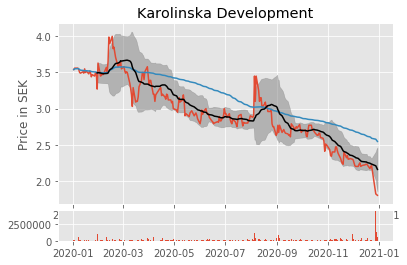

Eurocine Vaccines


TypeError: Object of type ndarray is not JSON serializable

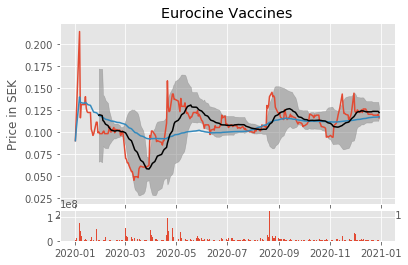

Future Gaming


TypeError: Object of type ndarray is not JSON serializable

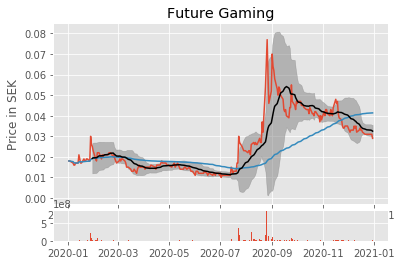

NFO Drives


TypeError: Object of type ndarray is not JSON serializable

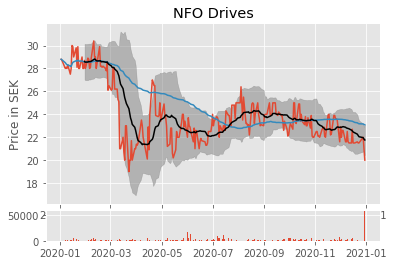

Nanexa


TypeError: Object of type ndarray is not JSON serializable

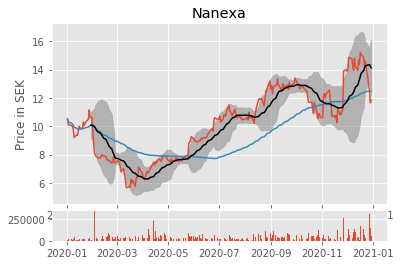

Genova Property Pref


TypeError: Object of type ndarray is not JSON serializable

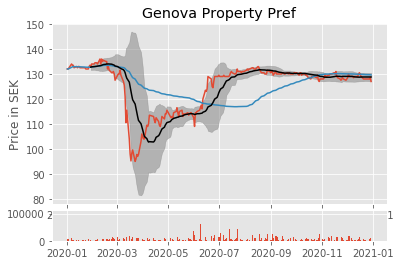

GC Rieber Shipping


TypeError: Object of type ndarray is not JSON serializable

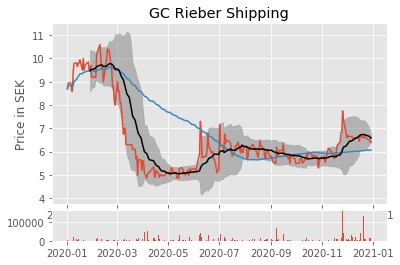

Philly Shipyard


TypeError: Object of type ndarray is not JSON serializable

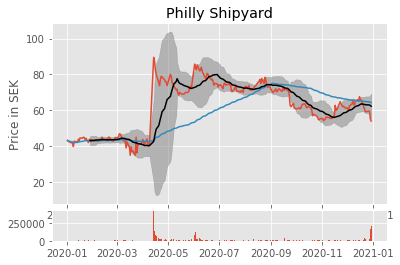

Freetrailer


TypeError: Object of type ndarray is not JSON serializable

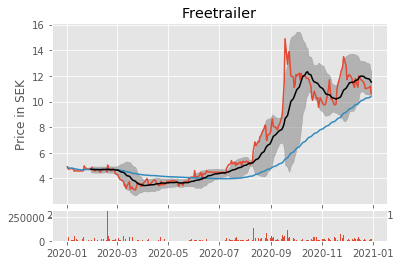

Samhällsbyggnadsbolag D


TypeError: Object of type ndarray is not JSON serializable

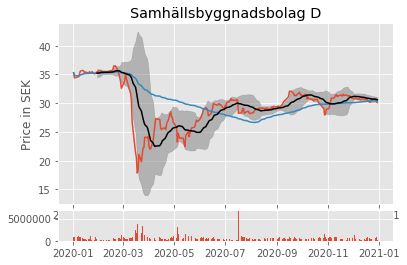

In [8]:
patterns = defaultdict(list)
pdf = FPDF()

for stock_name in name_to_id_dict:
    try:
        df = pd.read_csv('data/' + stock_name + '.csv', parse_dates=True, index_col=0)

        if df.tail(1)['Volume'][0] * df.tail(1)['Close'][0] > 200000:

            df['100ma'] = df['Close'].rolling(window=100, min_periods=0).mean()
            prior_100ma = df.tail(4)['100ma'][0]
            today_100ma = df.tail(1)['100ma'][0]
            prior_close = df.tail(4)['Close'][0]
            today_close = df.tail(1)['Close'][0]

            max_df, min_df = get_max_min(df)
            rhs = reversed_head_and_shoulder(max_df, min_df)
            if len(rhs) > 0:
                patterns[stock_name].append('rhs')

            bb = bollinger_band(df)
            if len(bb) > 0:
                patterns[stock_name].append('bb')

    except (TypeError, IndexError, FileNotFoundError):
        print(stock_name + ": Failed to compute.")

sorted_stocks = []
for k in sorted(patterns, key=lambda k: len(patterns[k]), reverse=True):
    sorted_stocks.append(k)

for stock_name in sorted_stocks:
    print(stock_name)
    df = pd.read_csv('data/' + stock_name + '.csv', parse_dates=True, index_col=0)
    df['100ma'] = df['Close'].rolling(window=100, min_periods=0).mean()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    ax1.plot(df.index, df['Close'], label='Close price')
    ax1.plot(df.index, df['100ma'], label='100 SMA')
    ax2.bar(df.index, df['Volume'], label='Volume')

    max_df, min_df = get_max_min(df)
    rhs = reversed_head_and_shoulder(max_df, min_df)
    for window in rhs:
        ax1.scatter(window.index, window, color='green', alpha=0.5)

    bb = bollinger_band(df)
    for df2 in bb:
        ax1.plot(df2.index, df2['20ma'], color='black', label='20 SMA')
        ax1.fill_between(df2.index, df2['upperband'], df2['lowerband'], color='grey', alpha=0.5, label="Bollinger Bands 20std")

    ax1.set_title(stock_name)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price in SEK')
    ax1.legend()
    ax2.legend()

    plt.savefig('graph_images/' + str(todays_date) + '_' + stock_name + '.png', dpi=200, papertype='legal')
    image = 'graph_images/' + str(todays_date) + '_' + stock_name + '.png'
    pdf.add_page()
    pdf.image(image, 0, 0, 210, 148)

    plt.show()
        
pdf.output("reports/" + str(todays_date) + ".pdf", "F")


<h5> From here we start with automated technical analysis, listing different algorithms </h5>

In [26]:
#A certainty score above 0.005 seems to be quite good
algo = Algorithm("sma_50_200", 10)
recommendation_df = pd.DataFrame(columns=['Stock', 'Signal', 'Certainty', 'Datetime', 'Algorithm name'])

for stock_name in name_to_id_dict:
    try:
        df = pd.read_csv('data/' + stock_name + '.csv', parse_dates=True)
        recommendation = algo.recommend(df)
        if len(recommendation) != 0:
            recommendation.insert(0, 'Stock', stock_name, True)
            recommendation_df = recommendation_df.append(recommendation, ignore_index=True)
            
    except (TypeError, IndexError):
        print(stock_name + ": Failed to compute.")

recommendation_df = recommendation_df.sort_values(by=['Certainty'], ascending=False)
recommendation_df = recommendation_df.reset_index(drop=True)
pd.set_option('display.max_rows', recommendation_df.shape[0]+1)
print(recommendation_df)

                        Stock Signal  Certainty    Datetime Algorithm name
0                   Immunovia   sell   0.010031  2020-12-28     sma_50_200
1                    Sealwacs   sell   0.008329  2020-12-16     sma_50_200
2                     Smoltek   sell   0.006874  2020-12-14     sma_50_200
3      Petroleum Geo-Services    buy   0.006748  2020-12-22     sma_50_200
4   Quartiers Properties Pref    buy   0.006504  2020-12-14     sma_50_200
5                    Polarcus    buy   0.005791  2020-12-23     sma_50_200
6                  Awilco LNG    buy   0.005770  2020-12-16     sma_50_200
7                     AroCell   sell   0.005627  2020-12-29     sma_50_200
8         SeaBird Exploration    buy   0.005221  2020-12-15     sma_50_200
9              Transferator B   sell   0.004727  2020-12-14     sma_50_200
10           Drilling Company    buy   0.004690  2020-12-14     sma_50_200
11      InDex Pharmaceuticals   sell   0.004535  2020-12-15     sma_50_200
12                      E

<h5> Machine learning algorithm below </h5>

In [27]:
def get_rsi(df):
    period = df.shape[0]
    temp = pd.DataFrame(columns=['Close'])
    temp['Close'] = df['Close'].pct_change()
    numbers = temp['Close'].values
    positives = np.where(numbers>0,numbers,0).sum(0)
    negatives = np.where(numbers<0,numbers,0).sum(0)
    x = abs(positives) * 100
    y = abs(negatives) * 100
    
    RSI = ( 100 - (100 / (1 + ( (x / period) / (y / period) ) ) ) ) / 100

    return RSI

In [28]:
def prepare_data(df):
    try:
        i = 20
        hm = 20
        df_X = pd.DataFrame()
        df_y = pd.DataFrame(columns=['label'])
        while True:
            df_100 = pd.DataFrame(columns=['Close','High','Low'])
            df_100['Close'] = df.iloc[i-hm: i]['Close']
            df_100['High'] = df.iloc[i-hm: i]['High']
            df_100['Low'] = df.iloc[i-hm: i]['Low']
            df_100['Volume'] = df.iloc[i-hm: i]['Volume']
            # % between Highest High and Close
            hc = (df_100['High'].max() / df_100.tail(1)['Close']).iloc[0]
            # % between Lowest Low and Close
            lc = (df_100['Low'].min() / df_100.tail(1)['Close']).iloc[0]
            # RSI
            RSI = get_rsi(df_100)
            
            df_bb = pd.DataFrame(columns=['20ma', '20std', 'upperband', 'lowerband'])
            df_bb['20ma'] = df_100['Close'].rolling(window=20).mean()
            df_bb['20std'] = df_100['Close'].rolling(window=20).std()
            df_bb['upperband'] = df_bb['20ma'] + (df_bb['20std'] * 2)
            df_bb['lowerband'] = df_bb['20ma'] - (df_bb['20std'] * 2)

            lband = df_bb.tail(1)['lowerband'].iloc[0]
            uband = df_bb.tail(1)['upperband'].iloc[0]
            
            # between upper Bollinderband and Close
            bcu = uband / df_100.tail(1)['Close'].iloc[0]
            # between lower Bollinderband and Close
            bcl = lband / df_100.tail(1)['Close'].iloc[0]
            
            # between Close and High for different days
            ch = (df_100.tail(1)['Close'] / df_100.tail(1)['High']).iloc[0]
            # between close and low
            cl = (df_100.tail(1)['Close'] / df_100.tail(1)['Low']).iloc[0]
            # between Simple Moving Average and Close
            smac = (df_100['Close'].mean() / df_100.tail(1)['Close']).iloc[0]
            # % Standard deviation
            std = df_100['Close'].std()

            df_temp = pd.DataFrame({'hc':[hc], 'lc':[lc], 'RSI':[RSI], 'bcu':[bcu], 'ch':[ch], 'cl':[cl], 'smac':[smac], 'std':[std]})
                        
            df_100['Close'] = (df_100['Close'] - df_100['Close'].mean()) / df_100['Close'].std()
            
            for j in range(hm):
                df_temp['c_{}_days_ago'.format(hm-j)] = df_100.iloc[j]['Close']
            for j in range(hm):
                df_temp['v_{}_days_ago'.format(hm-j)] = df_100.iloc[j]['Volume']

            df_101 = df.iloc[i-hm: i+1]['Close']
            normalized_label = ((df_101 - df_101.mean()) / df_101.std()).tail(1)
            temp_dict = {'label': normalized_label}
            i += 1
            df_y = df_y.append(temp_dict, ignore_index=True)
            if df_X.empty:
                df_X = df_temp
            else:
                df_X = df_X.append(df_temp, ignore_index=True)
    
            df_X.to_csv('dfx.csv')
            df_y.to_csv('dfy.csv')
    
    except IndexError:
        if df_X.empty:
            return False, False
        else:
            return df_X, df_y
        

In [29]:
def ml_train(X, y):
    try:
        clf = RandomForestRegressor(n_estimators=100, verbose=1)

        accuracy = cross_val_score(clf, X, y, scoring='r2', cv=10)

        print("R2 error: " + str(accuracy))
        print("R2 mean error: " + str(accuracy.mean()))
        
        clf.fit(X, y)

        filename = 'random_forest.sav'
        pickle.dump(clf, open(filename, 'wb'))

    except IndexError:
        print("Compute error")

In [30]:
def use_model(df):
    loaded_model = pickle.load(open(filename, 'rb'))
    result = loaded_model.score(X_test, Y_test)
    print(result)

In [31]:
i = 0
for stock_name in name_to_id_dict:
    df = pd.read_csv('data/' + stock_name + '.csv', parse_dates=True, index_col=0)
    df_X, df_y = prepare_data(df)
    if i == 0:
        X_all = df_X
        y_all = df_y
    else:
        try:
            X_all = X_all.append(df_X, ignore_index=True)
            y_all = y_all.append(df_y, ignore_index=True)
        except TypeError:
            print('Could not compute: ' + stock_name)
    i += 1

X = X_all.values
y = y_all.values.ravel()

print("Starting training:")
print("Feature data:")
print("Rows: " + str(X.shape[0]))
print("Cols: " + str(X.shape[1]))
print("Label data:")
print("Rows: " + str(y.shape[0]))
print("Cols: " + str(1))
ml_train(X, y)

c:\users\maxhx\onedrive\dokument\stocky\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
c:\users\maxhx\onedrive\dokument\stocky\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


Could not compute: Acando


OSError: [Errno 22] Invalid argument: 'dfx.csv'